                                    *Name:Esther Edijala*
              **Project: Exploratory Data Analysis (EDA) of Customer Transaction Patterns**
              
                                    

**Introduction**

This project focuses on conducting an exploratory data analysis (EDA) of customer transactions to uncover valuable insights and patterns. By leveraging two key datasets—one containing detailed customer information and the other capturing transaction data—we aim to analyze account activities and transaction trends.

The customer dataset provides comprehensive details on various aspects of customer accounts, including their status and product group associations. The transaction dataset offers a granular view of financial transactions, including amounts, timestamps, and descriptions.

The objective of this analysis is to identify trends, detect anomalies, and gain a deeper understanding of customer behavior. These insights will help in making informed decisions, enhancing customer engagement, and improving overall banking strategies and services.

For this project, we utilized two datasets:

1. **Customer Dataset:**
   - **Columns:**
     - `customer`
     - `accountid`
     - `workingbalance`
     - `openingdate`
     - `Restriction Code`
     - `address`
     - `email_1`
     - `account_status`
     - `Maxtransdate`
     - `product_group_desc`
     - `customer_type`
     - `region`
     - `sector`
     - `card_status`
     - `onebank`
     - `onepay`
     - `ussd`

2. **Transaction Dataset:**
   - **Columns:**
     - `customer`
     - `accountid`
     - `AMOUNT_LCY`
     - `Trans_ID`
     - `Trans_timestamp`
     - `deb_cre_ind`
     - `narrative`
     - `transactiondescription`

These datasets provided comprehensive information on customer details and their transaction activities, which were critical for conducting exploratory data analysis (EDA) and deriving actionable insights.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset
Transaction_df = pd.read_csv("transactions_data.csv")
Transaction_df.head()

,customer,accountid,AMOUNT_LCY,Trans_ID,Trans_timestamp,deb_cre_ind,narrative,transactiondescription
0,18354812,19888479,321685.00,FT202730YK10,2020-09-29 10:16:04.000,C,CHOICE INTERNATIONAL FORWARDING NIG?EMEKA LINU...,TRANSFER IN
1,12174614,16476167,1555.40,FT202661P8Q7,2020-09-22 15:47:31.000,C,BANK?NIP From 11000720092216005928289544?8107 ...,TRANSFER IN
2,13975321,15133256,331922.37,FT20274MBLN1,2020-09-30 15:05:40.997,C,BANK]SEPTEMBER SALARY 030202093421349,TRANSFER IN
3,13268397,13323967,28280.00,FT20266W5M7H,2020-09-22 07:30:57.000,C,BANK?NIP From 00001420092208270929929956?7597 ...,TRANSFER IN
4,11773959,14430794,363398.00,FT20268S7T8C,2020-09-24 11:08:32.000,C,BANK?NIP From 00001520092411552900116649?4596 ...,TRANSFER IN


In [3]:
# Display the columns
print(Transaction_df.columns)

Index(['customer', 'accountid', 'AMOUNT_LCY', 'Trans_ID', 'Trans_timestamp',
       'deb_cre_ind', 'narrative', 'transactiondescription'],
      dtype='object')


In [4]:
Transaction_df.shape

(219843, 8)

In [5]:
Transaction_df.describe()

,customer,accountid,AMOUNT_LCY
count,2.198430e+05,2.198430e+05,2.198430e+05
mean,1.503769e+07,1.508178e+07,3.075755e+05
std,2.879402e+06,2.911228e+06,9.501212e+06
min,1.000006e+07,1.000101e+07,1.000000e-02
25%,1.262833e+07,1.264174e+07,2.828000e+03
50%,1.504095e+07,1.500019e+07,7.282100e+03
75%,1.755726e+07,1.766098e+07,2.828000e+04
max,1.999980e+07,1.999918e+07,2.018167e+09


In [6]:
# Check for missing values
print("Missing values: ", Transaction_df.isnull().sum())


Missing values:  customer                     0
accountid                    0
AMOUNT_LCY                   0
Trans_ID                  4654
Trans_timestamp              0
deb_cre_ind                  0
narrative                  594
transactiondescription       1
dtype: int64


In [7]:
Transaction_df = Transaction_df.fillna(0)


In [8]:
print("Missing values: ", Transaction_df.isnull().sum())


Missing values:  customer                  0
accountid                 0
AMOUNT_LCY                0
Trans_ID                  0
Trans_timestamp           0
deb_cre_ind               0
narrative                 0
transactiondescription    0
dtype: int64


In [9]:
# Check for duplicates
print("Duplicate rows: ", Transaction_df.duplicated().sum())

Duplicate rows:  0


In [10]:
# Summary statistics
Transaction_df.describe()


,customer,accountid,AMOUNT_LCY
count,2.198430e+05,2.198430e+05,2.198430e+05
mean,1.503769e+07,1.508178e+07,3.075755e+05
std,2.879402e+06,2.911228e+06,9.501212e+06
min,1.000006e+07,1.000101e+07,1.000000e-02
25%,1.262833e+07,1.264174e+07,2.828000e+03
50%,1.504095e+07,1.500019e+07,7.282100e+03
75%,1.755726e+07,1.766098e+07,2.828000e+04
max,1.999980e+07,1.999918e+07,2.018167e+09


In [11]:
Transaction_df.head()

,customer,accountid,AMOUNT_LCY,Trans_ID,Trans_timestamp,deb_cre_ind,narrative,transactiondescription
0,18354812,19888479,321685.00,FT202730YK10,2020-09-29 10:16:04.000,C,CHOICE INTERNATIONAL FORWARDING NIG?EMEKA LINU...,TRANSFER IN
1,12174614,16476167,1555.40,FT202661P8Q7,2020-09-22 15:47:31.000,C,BANK?NIP From 11000720092216005928289544?8107 ...,TRANSFER IN
2,13975321,15133256,331922.37,FT20274MBLN1,2020-09-30 15:05:40.997,C,BANK]SEPTEMBER SALARY 030202093421349,TRANSFER IN
3,13268397,13323967,28280.00,FT20266W5M7H,2020-09-22 07:30:57.000,C,BANK?NIP From 00001420092208270929929956?7597 ...,TRANSFER IN
4,11773959,14430794,363398.00,FT20268S7T8C,2020-09-24 11:08:32.000,C,BANK?NIP From 00001520092411552900116649?4596 ...,TRANSFER IN


In [12]:
#Transaction_df["Trans_timestamp"]=pd.to_datetime(Transaction_df["Trans_timestamp"])

In [13]:
Transaction_df["Trans_timestamp"] = pd.to_datetime(Transaction_df["Trans_timestamp"],
errors='coerce', infer_datetime_format=True)


In [14]:
Transaction_df["Trans_timestamp"].dt.day

0         29.0
1         22.0
2         30.0
3         22.0
4         24.0
          ... 
219838     1.0
219839     4.0
219840     1.0
219841     8.0
219842     9.0
Name: Trans_timestamp, Length: 219843, dtype: float64

In [15]:
Transaction_df.nunique()

customer                    8783
accountid                   9164
AMOUNT_LCY                 15064
Trans_ID                  209819
Trans_timestamp           192976
deb_cre_ind                    2
narrative                 149124
transactiondescription        25
dtype: int64

In [16]:
Transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219843 entries, 0 to 219842
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   customer                219843 non-null  int64         
 1   accountid               219843 non-null  int64         
 2   AMOUNT_LCY              219843 non-null  float64       
 3   Trans_ID                219843 non-null  object        
 4   Trans_timestamp         207343 non-null  datetime64[ns]
 5   deb_cre_ind             219843 non-null  object        
 6   narrative               219843 non-null  object        
 7   transactiondescription  219843 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 13.4+ MB


In [17]:
Transaction_df["deb_cre_ind"].value_counts()

deb_cre_ind
D    156537
C     63306
Name: count, dtype: int64

In [18]:
Transaction_df["transactiondescription"].value_counts()

transactiondescription
TRF :                            87004
TRANSFER IN                      54073
CASH WITHDRAWAL                  32130
POINT OF SALE PURCHASE           23079
BILL PYMNT-FUNDS TRANSFER        12684
DEPOSIT CASH (LOCAL CURRENCY)     3717
TRANSFER OUT                      3263
NEFT CREDITS                      1200
ETRANZACT PAYMENT                  791
AA LOAN REPAYMENT                  562
CASH WITHDRAWAL(LOCAL CCY)         343
STANDING ORDER                     273
OUTWARD CHEQUE PAYMENT             162
CHEQUE                             128
DRAFT COMMISSION + VAT             121
CHEQUE DEPOSIT (INHOUSE)            93
ACCOUNTS TRANSFER                   80
AA DEBIT SETTLE ARRANGEMENT         40
CASH WITHDRAWAL FOREIGN CCY         37
CREDIT ARRANGEMENT                  28
NEW DEPOSIT                         16
DEPOSIT WITHDRAWAL (TRANSFER)        9
AA LOAN PAYOFF                       6
STERLING INWARD TELEX PAYMENT        3
0                                    1
Na

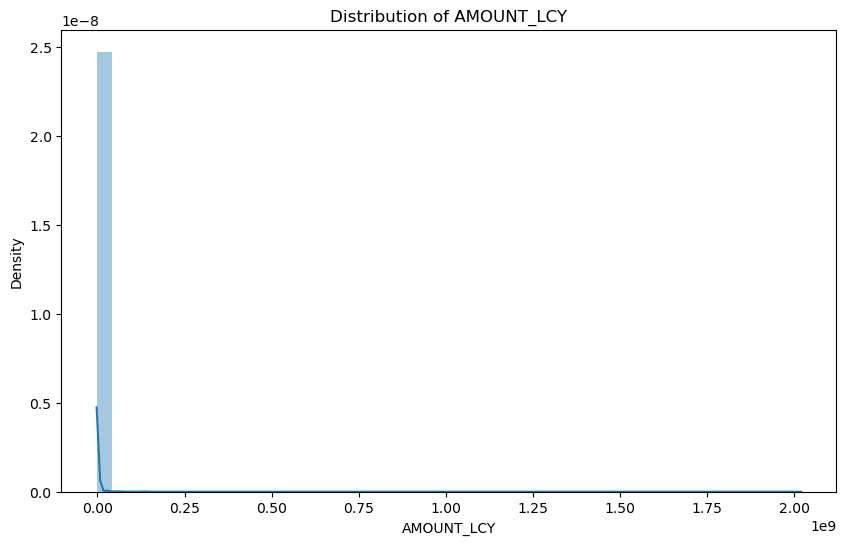

In [19]:
# Distribution of 'AMOUNT_LCY'
plt.figure(figsize=(10, 6))
sns.distplot(Transaction_df['AMOUNT_LCY'])
plt.title('Distribution of AMOUNT_LCY')
plt.show()

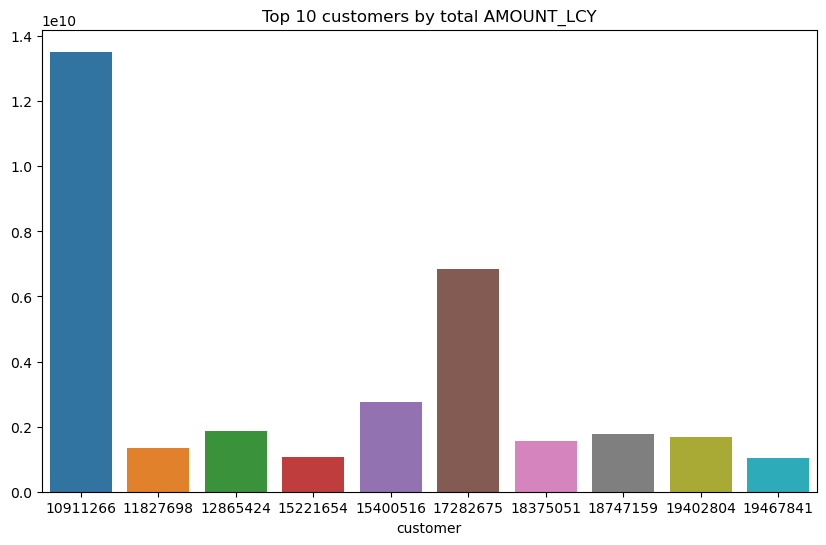

In [20]:
# Top 10 customers by total 'AMOUNT_LCY'
top_customers = Transaction_df.groupby('customer')['AMOUNT_LCY'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_customers.index, y=top_customers.values)
plt.title('Top 10 customers by total AMOUNT_LCY')
plt.show()

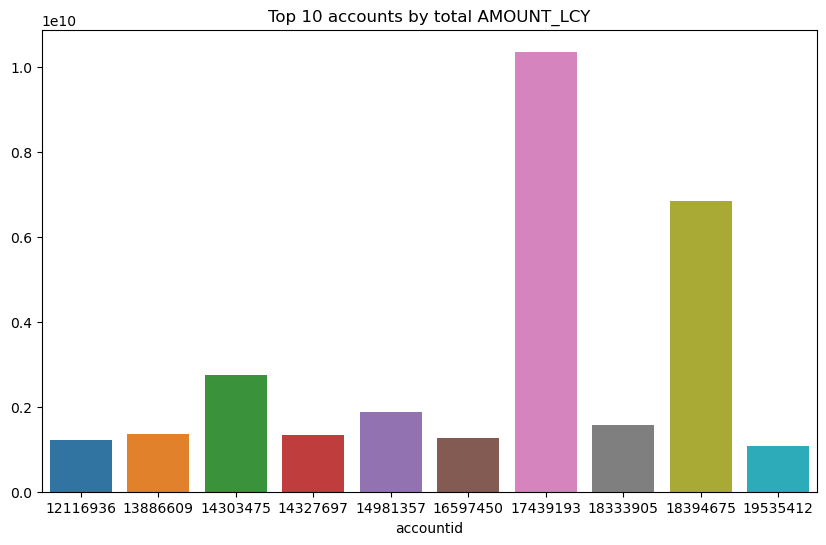

In [21]:
# Top 10 accounts by total 'AMOUNT_LCY'
top_accounts = Transaction_df.groupby('accountid')['AMOUNT_LCY'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_accounts.index, y=top_accounts.values)
plt.title('Top 10 accounts by total AMOUNT_LCY')
plt.show()


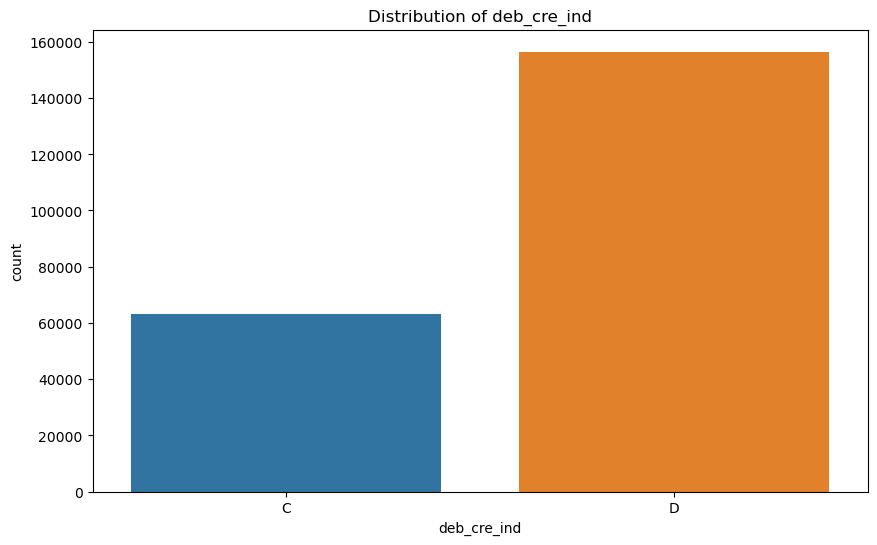

In [22]:
# Distribution of 'deb_cre_ind'
plt.figure(figsize=(10, 6))
sns.countplot(x='deb_cre_ind', data=Transaction_df)
plt.title('Distribution of deb_cre_ind')
plt.show()

In [23]:
# Word cloud of 'narrative'
#import nltk
#nltk.download()

#from wordcloud import WordCloud


#wordcloud = WordCloud().generate(' '.join(Transaction_df['narrative'].astype(str)))
#plt.figure(figsize=(10, 6))
#plt.imshow(wordcloud, interpolation='bilinear')
#plt.axis("off")
#plt.title('Word cloud of narrative')
#plt.show()


In [24]:
Transaction_df.head()

,customer,accountid,AMOUNT_LCY,Trans_ID,Trans_timestamp,deb_cre_ind,narrative,transactiondescription
0,18354812,19888479,321685.00,FT202730YK10,2020-09-29 10:16:04.000,C,CHOICE INTERNATIONAL FORWARDING NIG?EMEKA LINU...,TRANSFER IN
1,12174614,16476167,1555.40,FT202661P8Q7,2020-09-22 15:47:31.000,C,BANK?NIP From 11000720092216005928289544?8107 ...,TRANSFER IN
2,13975321,15133256,331922.37,FT20274MBLN1,2020-09-30 15:05:40.997,C,BANK]SEPTEMBER SALARY 030202093421349,TRANSFER IN
3,13268397,13323967,28280.00,FT20266W5M7H,2020-09-22 07:30:57.000,C,BANK?NIP From 00001420092208270929929956?7597 ...,TRANSFER IN
4,11773959,14430794,363398.00,FT20268S7T8C,2020-09-24 11:08:32.000,C,BANK?NIP From 00001520092411552900116649?4596 ...,TRANSFER IN


In [25]:
Transaction_df.columns

Index(['customer', 'accountid', 'AMOUNT_LCY', 'Trans_ID', 'Trans_timestamp',
       'deb_cre_ind', 'narrative', 'transactiondescription'],
      dtype='object')

<Axes: title={'center': 'Transaction Description'}, xlabel='transactiondescription'>

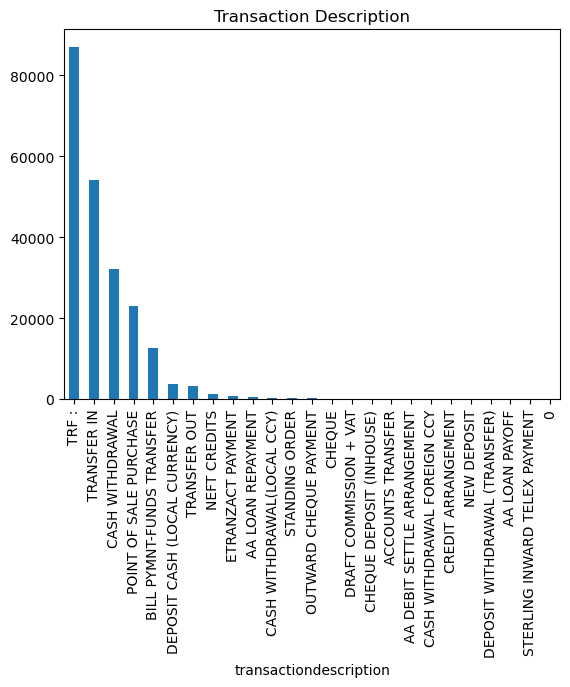

In [26]:
Transaction_df["transactiondescription"].value_counts().plot.bar(title="Transaction Description")

In [27]:
#Reading in the Customers Dataset
customers_data = pd.read_table('customers_data.csv')
customers_data.head()

,customer,accountid,workingbalance,openingdate,Restriciton Code,address,email_1,account_status,Maxtransdate,product_group_desc,customer_type,region,sector,card_status,onebank,onepay,ussd
0,15045151,14607892,88.01,2016-06-10,25,NaN,NaN,Dormant,2020-10-27,Savings Accounts Group,Individual Customer,APAPA & BEYOND,ADMIN AND SUPPORT SERVICE ACT.,NaN,0,0,0
1,16273893,11143214,25293.31,2016-10-28,NaN,"IJESHA, LAGOS",NaN,Active,2022-03-23,Savings Accounts Group,Individual Customer,APAPA & BEYOND,GENERAL,Active,0,0,1
2,17261366,15599591,3328.29,2016-09-22,19$23$25,AJEGUNLE AJEROMI,NaN,Dormant,2020-10-14,Savings Accounts Group,Individual Customer,APAPA & BEYOND,GENERAL,NaN,0,0,0
3,14006532,17841524,2110.85,2021-01-21,NaN,STOP KIRIKIRI TOWN,NaN,Active,2022-03-08,Current Accounts Group,Individual Customer,APAPA & BEYOND,GENERAL,NaN,0,0,0
4,19087216,11994865,88.01,2016-06-15,25,OLODI APAPA,NaN,Dormant,2020-10-20,Savings Accounts Group,Individual Customer,APAPA & BEYOND,ADMIN AND SUPPORT SERVICE ACT.,NaN,0,0,0


In [28]:
customers_data.shape


(5000, 17)

In [29]:
customers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer            5000 non-null   int64  
 1   accountid           5000 non-null   int64  
 2   workingbalance      5000 non-null   float64
 3   openingdate         5000 non-null   object 
 4   Restriciton Code    3532 non-null   object 
 5   address             4317 non-null   object 
 6   email_1             1586 non-null   object 
 7   account_status      5000 non-null   object 
 8   Maxtransdate        5000 non-null   object 
 9   product_group_desc  4931 non-null   object 
 10  customer_type       5000 non-null   object 
 11  region              5000 non-null   object 
 12  sector              5000 non-null   object 
 13  card_status         1873 non-null   object 
 14  onebank             5000 non-null   int64  
 15  onepay              5000 non-null   int64  
 16  ussd  

In [30]:
customers_data.describe()

,customer,accountid,workingbalance,onebank,onepay,ussd
count,5.000000e+03,5.000000e+03,5.000000e+03,5000.000000,5000.000000,5000.000000
mean,1.501572e+07,1.496175e+07,-3.110929e+05,0.094400,0.169400,0.178600
std,2.917798e+06,2.895771e+06,2.796984e+07,0.292414,0.375142,0.383055
min,1.000006e+07,1.000002e+07,-1.972557e+09,0.000000,0.000000,0.000000
25%,1.245201e+07,1.243579e+07,9.337750e+01,0.000000,0.000000,0.000000
50%,1.499100e+07,1.493074e+07,9.578150e+02,0.000000,0.000000,0.000000
75%,1.754916e+07,1.747498e+07,5.389932e+03,0.000000,0.000000,0.000000
max,1.999880e+07,1.999780e+07,1.020330e+08,1.000000,1.000000,1.000000


In [31]:
customers_data["account_status"].value_counts()

account_status
Dormant     3260
Active      1456
Inactive     284
Name: count, dtype: int64

In [32]:
customers_data["product_group_desc"].value_counts()

product_group_desc
Savings Accounts Group               3769
Current Accounts Group                858
Domiciliary Current Account Group     141
Retail Loans Individual Group          61
Domiciliary Savings Account Group      53
Term Deposits Group                    26
Corporate Loans Group                  17
HRM Loans Group                         4
Small Business Loans Group              1
Customer Collection a/c Group           1
Name: count, dtype: int64

In [33]:
customers_data["card_status"].value_counts()

card_status
Active        1479
Expired        312
Restricted      82
Name: count, dtype: int64

In [34]:
customers_data["onebank"].value_counts()

onebank
0    4528
1     472
Name: count, dtype: int64

In [35]:
customers_data["onepay"].value_counts()

onepay
0    4153
1     847
Name: count, dtype: int64

In [36]:
customers_data["ussd"].value_counts()

ussd
0    4107
1     893
Name: count, dtype: int64

In [37]:
customers_data["customer_type"].value_counts()

customer_type
Individual Customer                4106
Corporate Customer                  332
Salary Customer                     183
Minor                               147
Enterprise Customer                 100
MSME                                 39
Individual Staff                     38
Youth Corper                         20
Internal Customer                    15
Not for Profit                        7
EMBASSY/HIGH COMMISSION               4
DSE                                   3
Joint Customers                       2
Trainee                               1
Government/MDA Customer (State)       1
Student                               1
Government/MDA Customer (FGN)         1
Name: count, dtype: int64

In [38]:
print("Missing values: ", customers_data.isnull().sum())

Missing values:  customer                 0
accountid                0
workingbalance           0
openingdate              0
Restriciton Code      1468
address                683
email_1               3414
account_status           0
Maxtransdate             0
product_group_desc      69
customer_type            0
region                   0
sector                   0
card_status           3127
onebank                  0
onepay                   0
ussd                     0
dtype: int64


In [39]:
customers_df = customers_data.dropna(how = 'all')

In [40]:
customers_df.head()

,customer,accountid,workingbalance,openingdate,Restriciton Code,address,email_1,account_status,Maxtransdate,product_group_desc,customer_type,region,sector,card_status,onebank,onepay,ussd
0,15045151,14607892,88.01,2016-06-10,25,NaN,NaN,Dormant,2020-10-27,Savings Accounts Group,Individual Customer,APAPA & BEYOND,ADMIN AND SUPPORT SERVICE ACT.,NaN,0,0,0
1,16273893,11143214,25293.31,2016-10-28,NaN,"IJESHA, LAGOS",NaN,Active,2022-03-23,Savings Accounts Group,Individual Customer,APAPA & BEYOND,GENERAL,Active,0,0,1
2,17261366,15599591,3328.29,2016-09-22,19$23$25,AJEGUNLE AJEROMI,NaN,Dormant,2020-10-14,Savings Accounts Group,Individual Customer,APAPA & BEYOND,GENERAL,NaN,0,0,0
3,14006532,17841524,2110.85,2021-01-21,NaN,STOP KIRIKIRI TOWN,NaN,Active,2022-03-08,Current Accounts Group,Individual Customer,APAPA & BEYOND,GENERAL,NaN,0,0,0
4,19087216,11994865,88.01,2016-06-15,25,OLODI APAPA,NaN,Dormant,2020-10-20,Savings Accounts Group,Individual Customer,APAPA & BEYOND,ADMIN AND SUPPORT SERVICE ACT.,NaN,0,0,0


In [41]:
# Display the columns
print(customers_df.columns)

Index(['customer', 'accountid', 'workingbalance', 'openingdate',
       'Restriciton Code', 'address', 'email_1', 'account_status',
       'Maxtransdate', 'product_group_desc', 'customer_type', 'region',
       'sector', 'card_status', 'onebank', 'onepay', 'ussd'],
      dtype='object')


<Axes: xlabel='customer_type'>

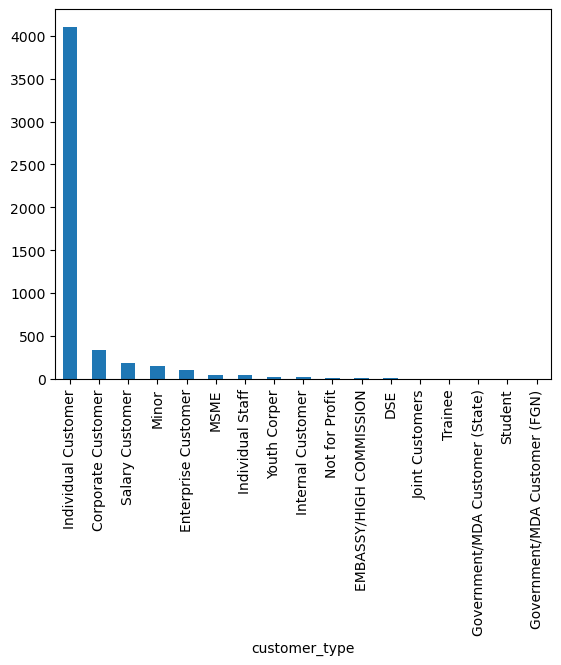

In [42]:
customers_df["customer_type"].value_counts().plot.bar()

In [43]:
customers_df.product_group_desc

0       Savings Accounts Group
1       Savings Accounts Group
2       Savings Accounts Group
3       Current Accounts Group
4       Savings Accounts Group
                 ...          
4995    Savings Accounts Group
4996    Savings Accounts Group
4997    Savings Accounts Group
4998    Current Accounts Group
4999    Savings Accounts Group
Name: product_group_desc, Length: 5000, dtype: object

<Axes: xlabel='account_status'>

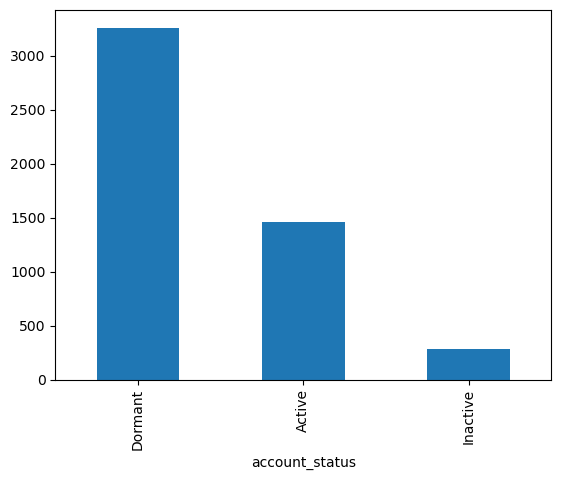

In [44]:
customers_df["account_status"].value_counts().plot.bar()

<Axes: xlabel='product_group_desc'>

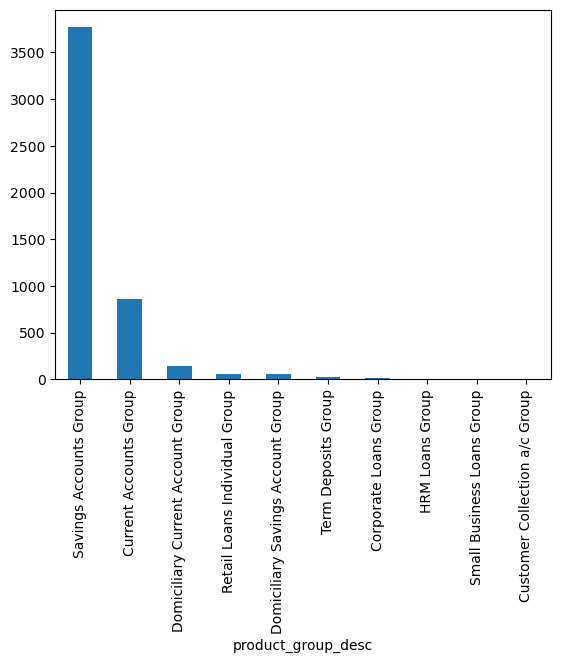

In [45]:
customers_df["product_group_desc"].value_counts().plot.bar()

<Axes: xlabel='card_status'>

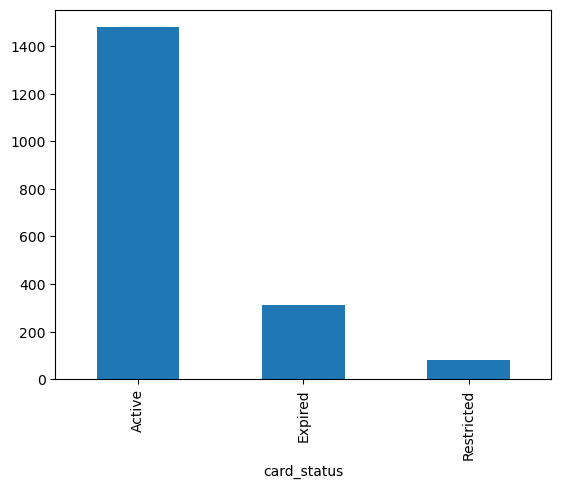

In [46]:
customers_df["card_status"].value_counts().plot.bar()

<Axes: title={'center': 'Card Status'}, xlabel='card_status'>

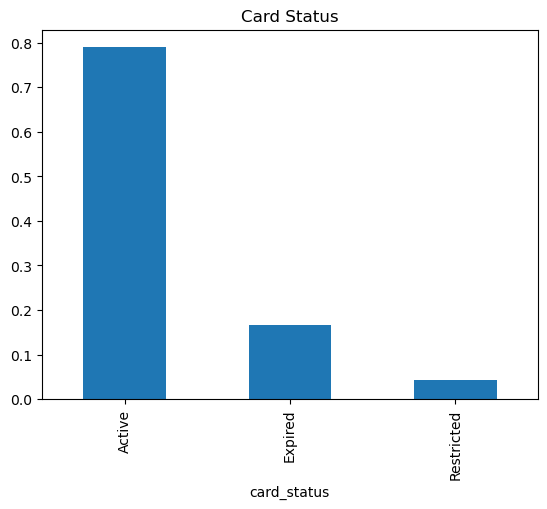

In [47]:
customers_df["card_status"].value_counts(normalize=True).plot.bar(title='Card Status')

account_status,Active,Dormant,Inactive
customer_type,,,
Corporate Customer,88,224,20
DSE,3,0,0
EMBASSY/HIGH COMMISSION,3,0,1
Enterprise Customer,37,59,4
Government/MDA Customer (FGN),0,1,0
Government/MDA Customer (State),0,1,0
Individual Customer,1123,2759,224
Individual Staff,32,6,0
Internal Customer,12,3,0


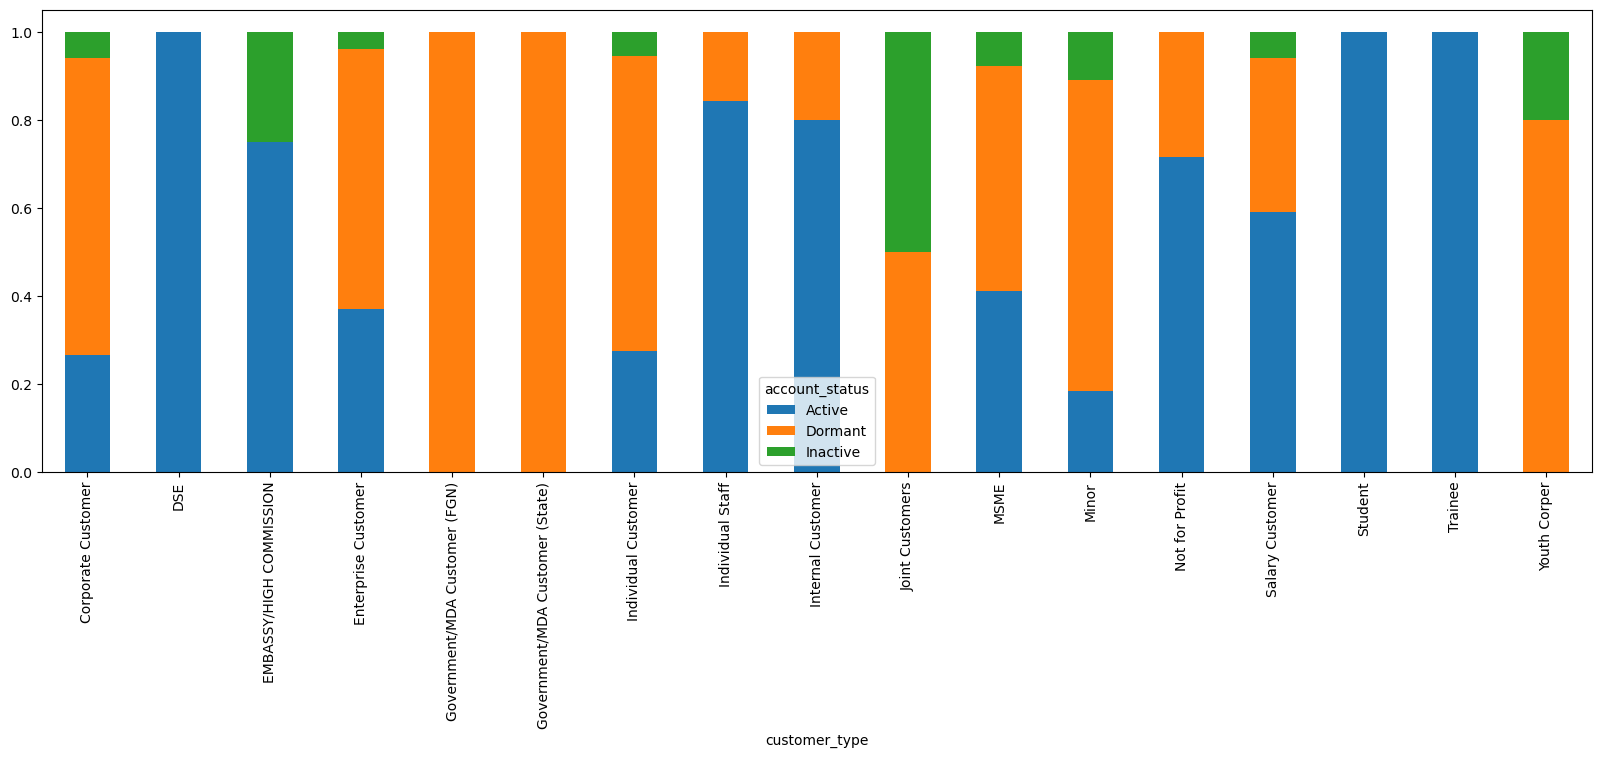

In [48]:
Customer_type=pd.crosstab(customers_df["customer_type"], customers_df["account_status"])
Customer_type.div(Customer_type.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(20,6) )
Customer_type

The data reveals that **Individual** and **Corporate Customers** have the highest number of dormant accounts, signaling a need for reactivation efforts. 
**Enterprise**, **Minor**, and **MSME Customers** also show notable dormancy. Other customer types, such as **Government/MDA**, **Youth Corper**, and **Salary Customers**, have fewer active accounts, which may align with their expected behavior but still require monitoring. 
Overall, focusing on re-engagement strategies, particularly for Individual and Corporate Customers, is crucial.

account_status,Active,Dormant,Inactive
sector,,,
ADMIN AND SUPPORT SERVICE ACT.,97,240,11
AGRICULTURE,9,36,2
ARTS ENTERTAINMENT AND RECREATION,1,0,0
CONSTRUCTION,10,6,3
Cooperative Cluster,7,0,2
EDUCATION,9,31,0
FINANCE AND INSURANCE,18,24,1
GENERAL,1187,2617,242
GENERAL COMMERCE,39,130,11


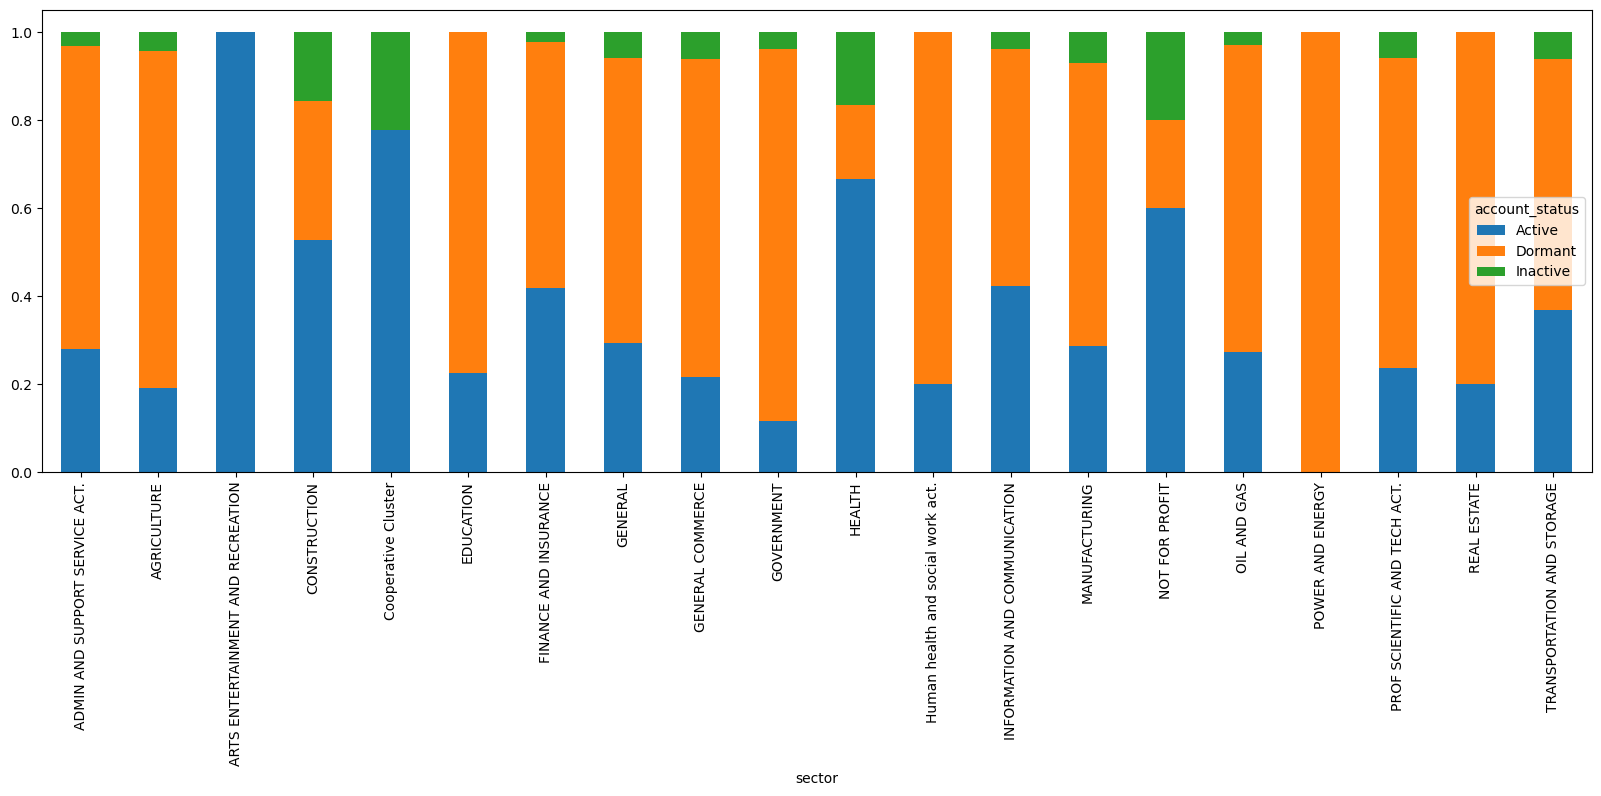

In [49]:
Sector=pd.crosstab(customers_df["sector"],customers_df["account_status"])
Sector.div(Sector.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(20,6))
Sector

# Comment

- From the above plot:
  - "ADMIN AND SUPPORT SERVICE ACT." has 240 dormant accounts.
  - The "GENERAL" sector has 2,617 dormant accounts.
  - "GENERAL COMMERCE" has 130 dormant accounts.

These sectors can be targeted by sending notifications to re-engage customers, potentially boosting transaction volumes and generating additional revenue. Leveraging artificial intelligence through personalized alerts in their banking app could also enhance reactivation efforts.

account_status,Active,Dormant,Inactive
product_group_desc,,,
Corporate Loans Group,17,0,0
Current Accounts Group,321,485,52
Customer Collection a/c Group,1,0,0
Domiciliary Current Account Group,35,94,12
Domiciliary Savings Account Group,16,31,6
HRM Loans Group,4,0,0
Retail Loans Individual Group,61,0,0
Savings Accounts Group,944,2615,210
Small Business Loans Group,1,0,0


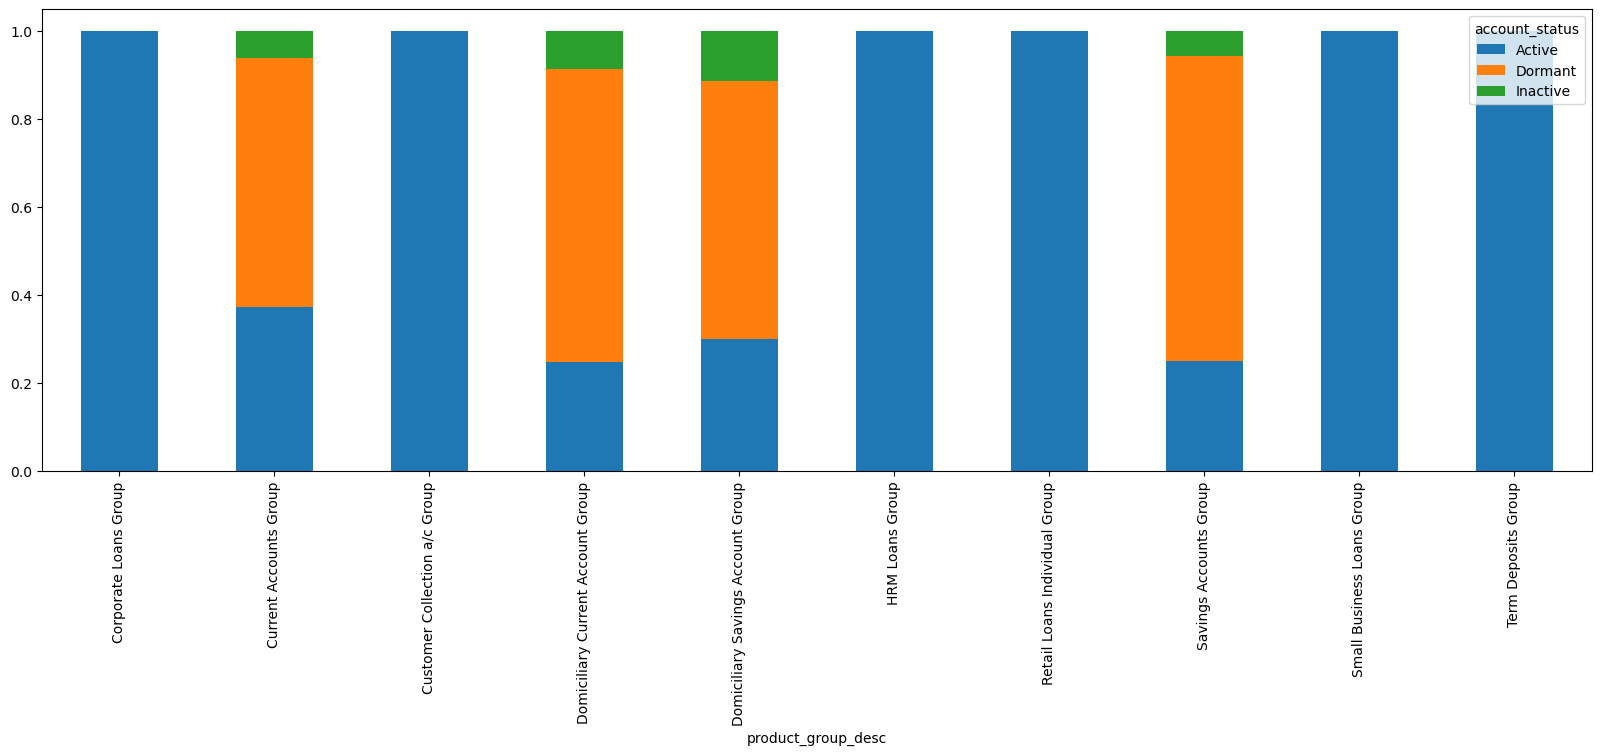

In [94]:
Product_group=pd.crosstab(customers_df["product_group_desc"],customers_df["account_status"])
Product_group.div(Product_group.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(20,6))
Product_group

account_status  Active  Dormant  Inactive
region                                   
APAPA & BEYOND    1456     3260       284


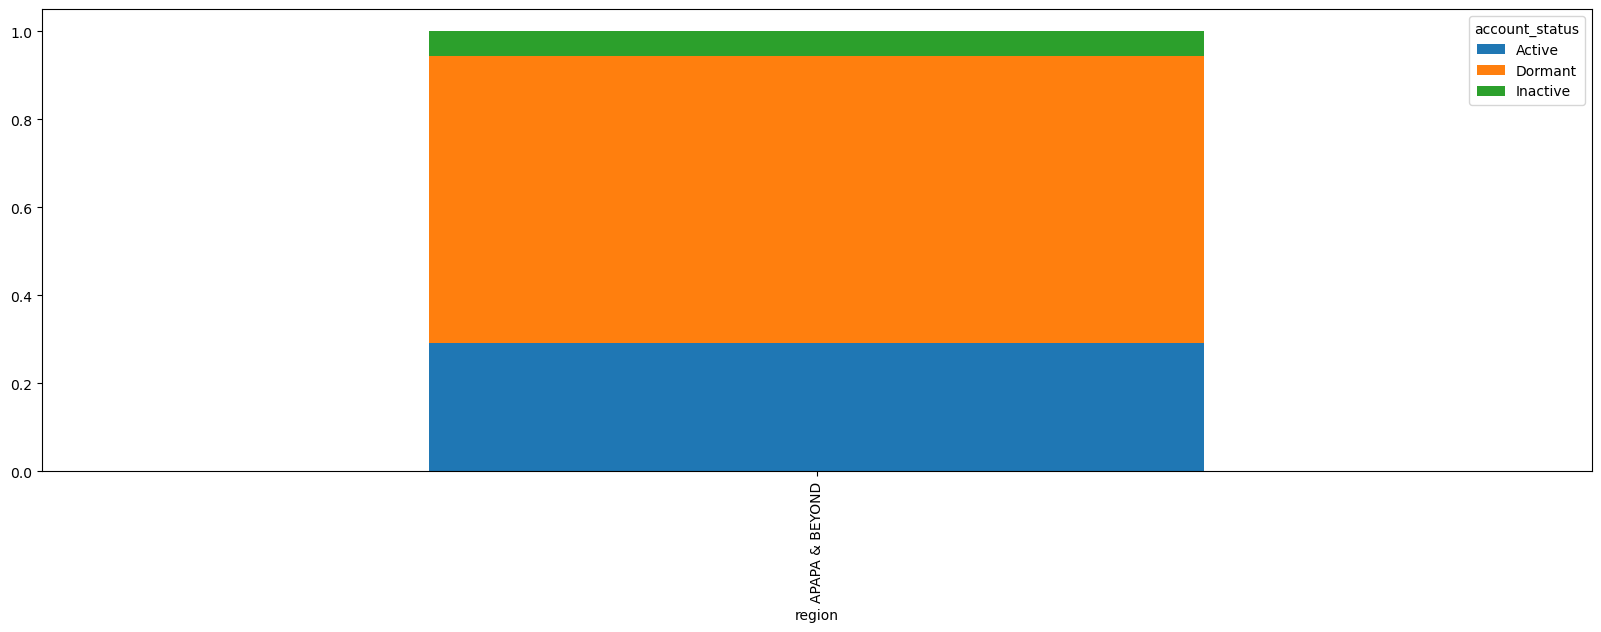

In [51]:
region=pd.crosstab(customers_df["region"],customers_df["account_status"])
region.div(region.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(20,6))
print(region)

In [52]:
customers_df.head(3)

,customer,accountid,workingbalance,openingdate,Restriciton Code,address,email_1,account_status,Maxtransdate,product_group_desc,customer_type,region,sector,card_status,onebank,onepay,ussd
0,15045151,14607892,88.01,2016-06-10,25,NaN,NaN,Dormant,2020-10-27,Savings Accounts Group,Individual Customer,APAPA & BEYOND,ADMIN AND SUPPORT SERVICE ACT.,NaN,0,0,0
1,16273893,11143214,25293.31,2016-10-28,NaN,"IJESHA, LAGOS",NaN,Active,2022-03-23,Savings Accounts Group,Individual Customer,APAPA & BEYOND,GENERAL,Active,0,0,1
2,17261366,15599591,3328.29,2016-09-22,19$23$25,AJEGUNLE AJEROMI,NaN,Dormant,2020-10-14,Savings Accounts Group,Individual Customer,APAPA & BEYOND,GENERAL,NaN,0,0,0


account_status,Active,Dormant,Inactive
card_status,,,
Active,1017,377,85
Expired,102,189,21
Restricted,35,40,7


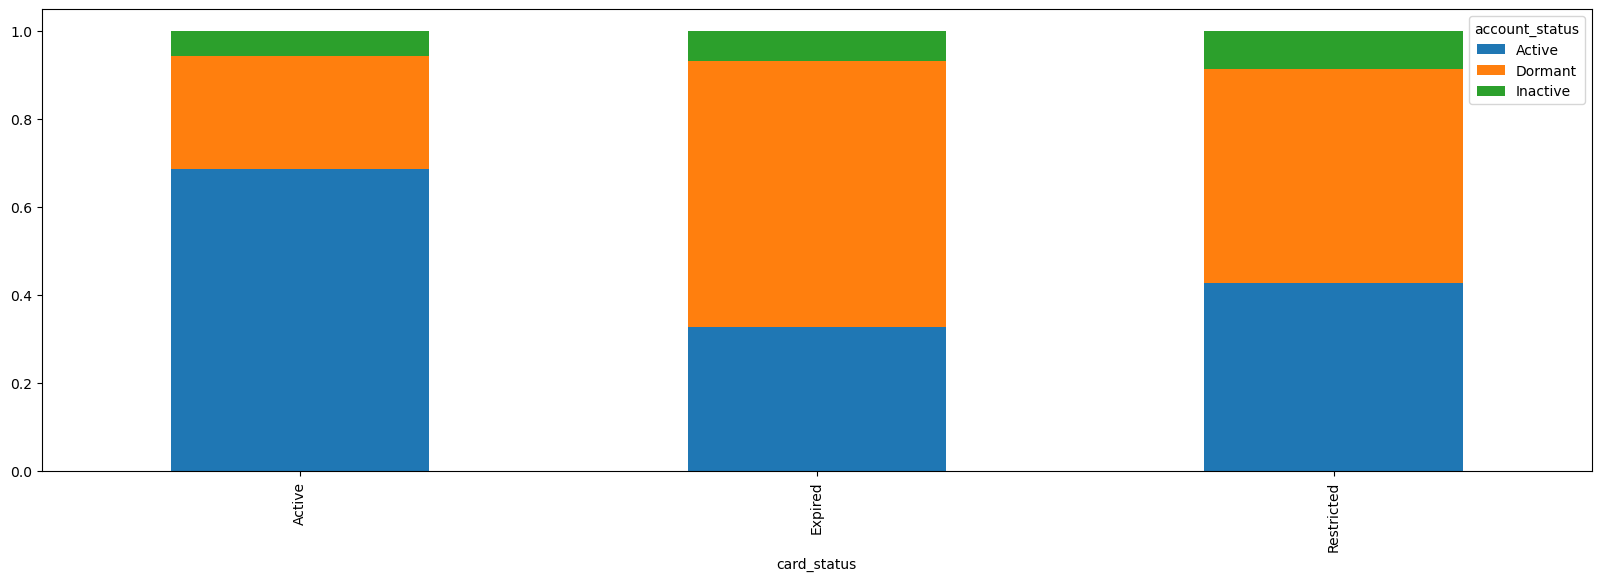

In [53]:
Card_status=pd.crosstab(customers_df["card_status"], customers_df["account_status"])
Card_status.div(Card_status.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True, figsize=(20,6))
Card_status

- From the above plot:
  - "Active" card status has 377 dormant accounts.
  - "Expired" card status has 189 dormant accounts.
  - "Restricted" card status has 40 dormant accounts.

These cardholders can be targeted for reactivation efforts. Sending notifications to update their card status could help increase account activity and generate additional revenue for the bank. Leveraging artificial intelligence through personalized alerts in their banking app could further enhance these efforts.

account_status,Active,Dormant,Inactive
onepay,,,
0,889,3036,228
1,567,224,56


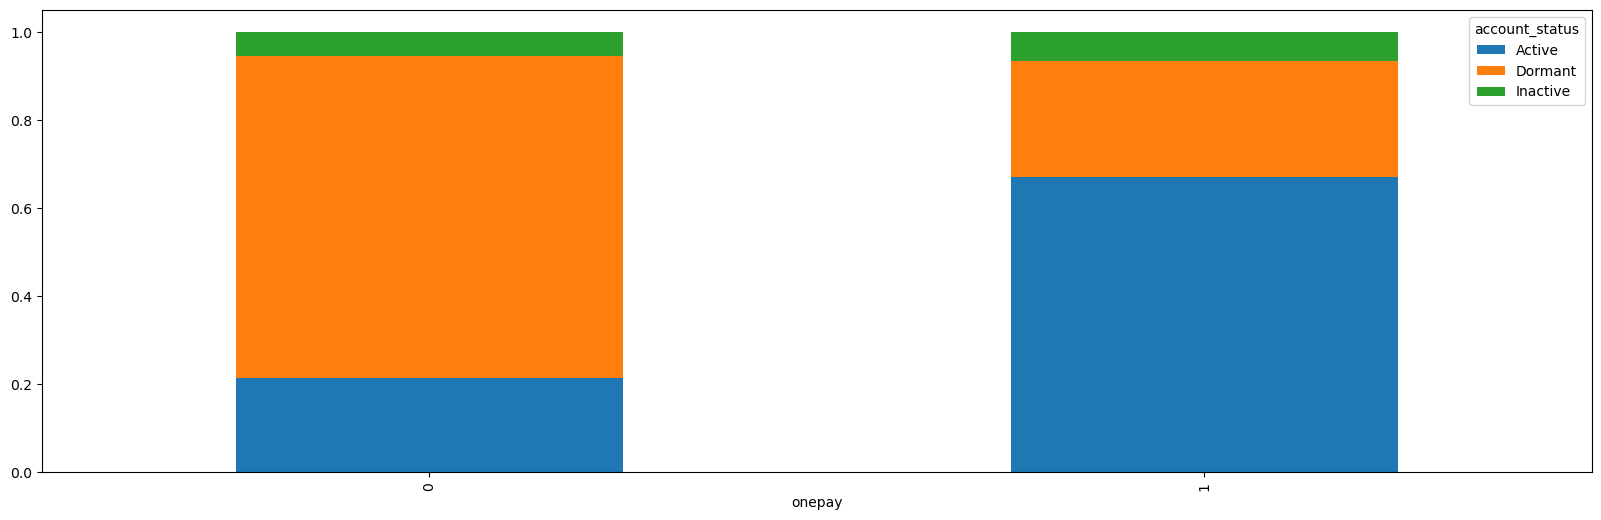

In [54]:
onepay=pd.crosstab(customers_df["onepay"], customers_df["account_status"])
onepay.div(onepay.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(20,6))
onepay

- From the above plot:
  - Customers not using OnePay ("0") have 3,036 dormant accounts.
  - Customers using OnePay ("1") have 224 dormant accounts.

This suggests that OnePay users are more likely to keep their accounts active. Targeting non-OnePay users with promotions or incentives to adopt OnePay could help reduce dormancy and increase account activity.

onepay,0,1
customer_type,,
Corporate Customer,331,1
DSE,0,3
EMBASSY/HIGH COMMISSION,4,0
Enterprise Customer,100,0
Government/MDA Customer (FGN),1,0
Government/MDA Customer (State),1,0
Individual Customer,3402,704
Individual Staff,0,38
Internal Customer,15,0


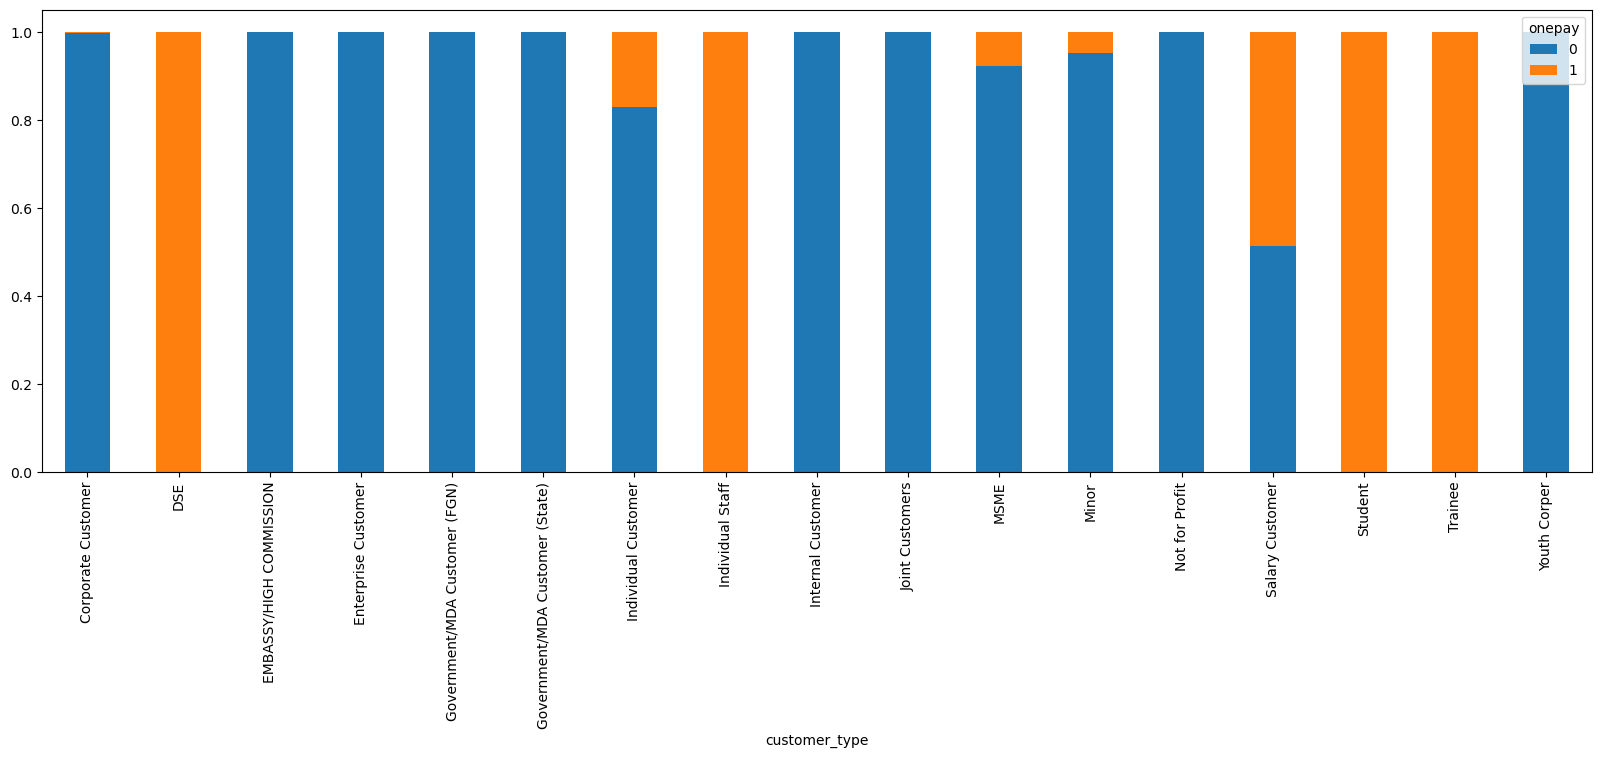

In [55]:
onepay=pd.crosstab(customers_df["customer_type"], customers_df["onepay"])
onepay.div(onepay.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(20,6))
onepay

- From the above data:
  - "Individual Customers" have 3,402 not using OnePay and 704 using it.
  - "Corporate Customers" have 331 not using OnePay and only 1 using it.
  - "Salary Customers" have 94 not using OnePay and 89 using it.

This indicates a significant opportunity to increase OnePay adoption among "Corporate Customers" and "Individual Customers," where the majority are not yet using the service. Encouraging these customer types to adopt OnePay could enhance their account activity and overall engagement.

onepay,0,1
account_status,,
Active,889,567
Dormant,3036,224
Inactive,228,56


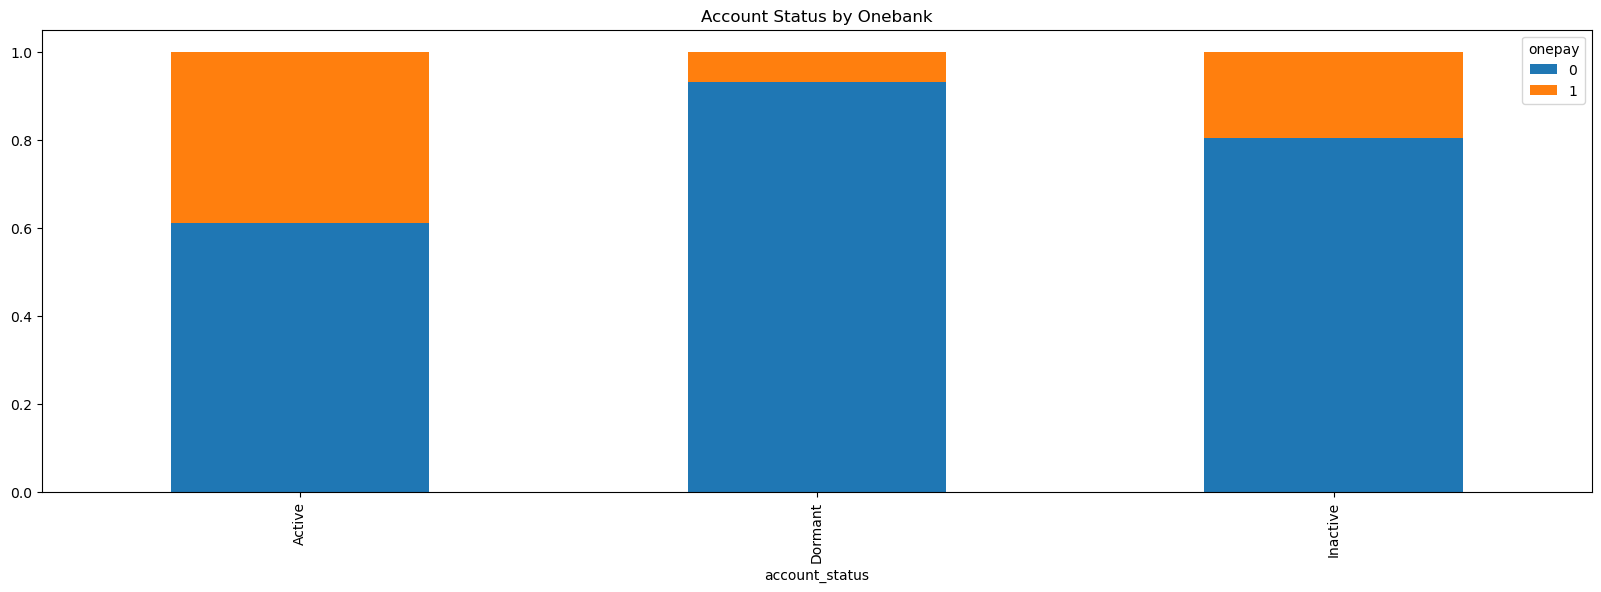

In [56]:
onebank=pd.crosstab(customers_df["account_status"], customers_df["onepay"])
onebank.div(onebank.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(20,6),title="Account Status by Onebank")
onebank

- From the above data:
  - "Active" accounts include 889 customers not using OnePay and 567 customers using it.
  - "Dormant" accounts include 3,036 customers not using OnePay and 224 customers using it.
  - "Inactive" accounts include 228 customers not using OnePay and 56 customers using it.

This indicates that customers who use OnePay are more likely to keep their accounts active, with significantly fewer dormant and inactive accounts. There is a significant opportunity to reduce dormancy and inactivity by encouraging non-OnePay users to adopt the service, which could lead to increased account activity and overall engagement.

onebank,0,1
customer_type,,
Corporate Customer,330,2
DSE,1,2
EMBASSY/HIGH COMMISSION,4,0
Enterprise Customer,100,0
Government/MDA Customer (FGN),1,0
Government/MDA Customer (State),1,0
Individual Customer,3705,401
Individual Staff,0,38
Internal Customer,15,0


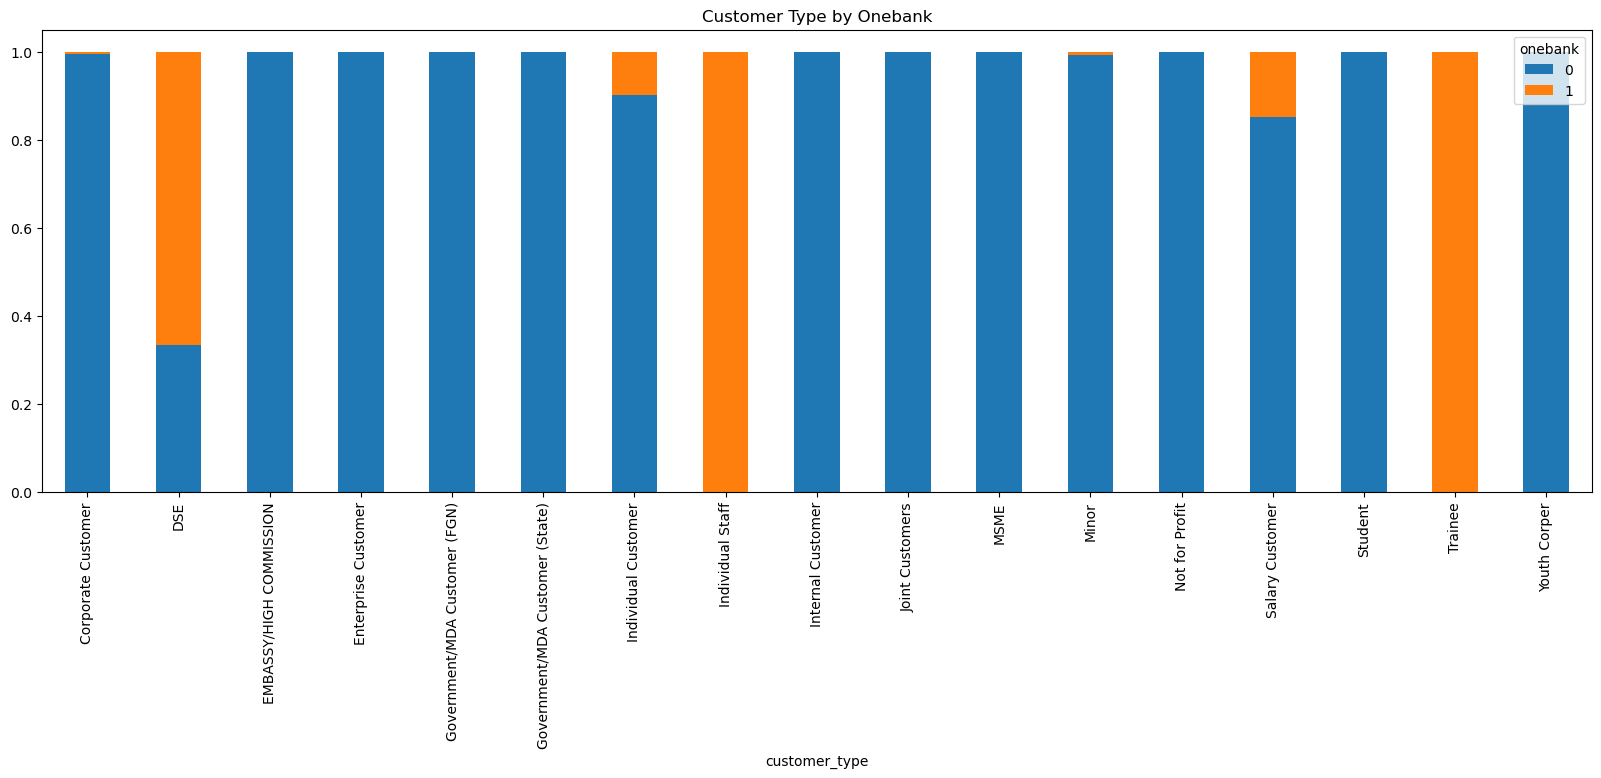

In [57]:
onebank=pd.crosstab(customers_df["customer_type"], customers_df["onebank"])
onebank.div(onebank.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(20,6),title="Customer Type by Onebank")
onebank

ussd,0,1
account_status,,
Active,844,612
Dormant,3039,221
Inactive,224,60


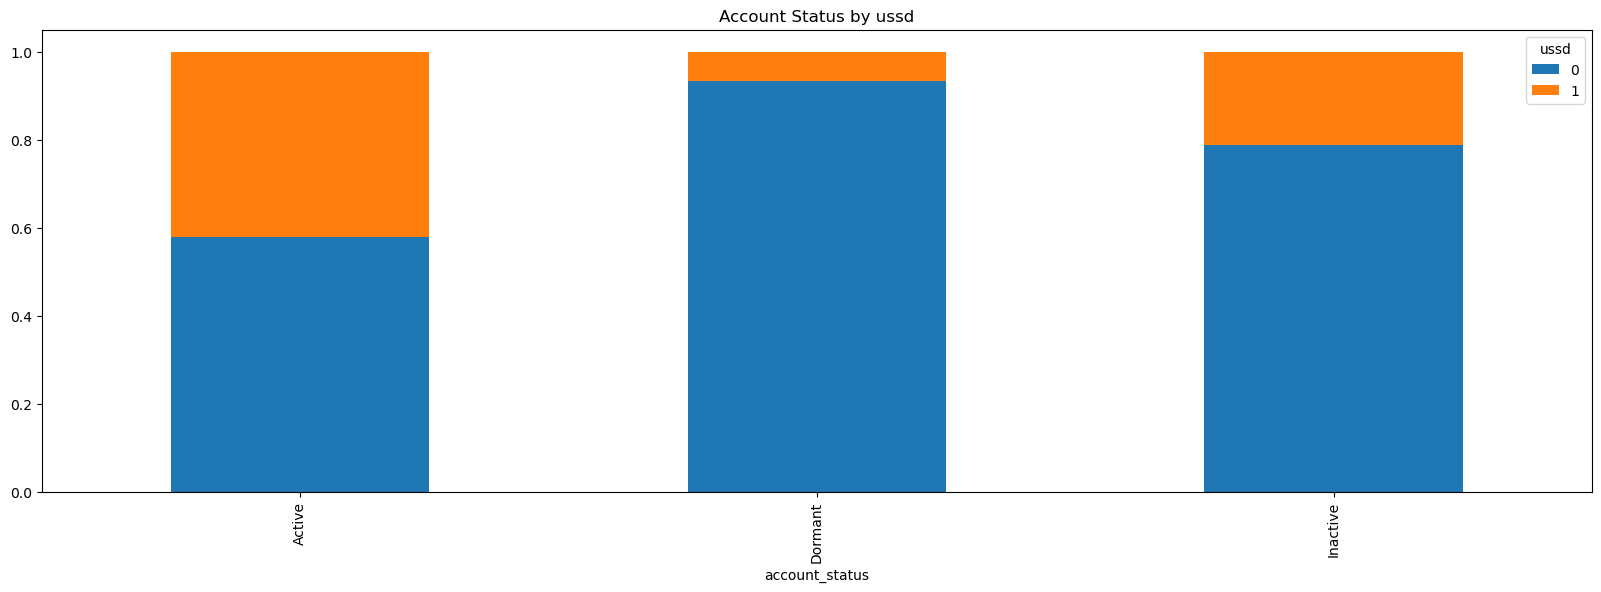

In [58]:
ussd=pd.crosstab(customers_df["account_status"], customers_df["ussd"])
ussd.div(ussd.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(20,6),title="Account Status by ussd")
ussd

ussd,0,1
customer_type,,
Corporate Customer,331,1
DSE,1,2
EMBASSY/HIGH COMMISSION,4,0
Enterprise Customer,100,0
Government/MDA Customer (FGN),1,0
Government/MDA Customer (State),1,0
Individual Customer,3332,774
Individual Staff,32,6
Internal Customer,15,0


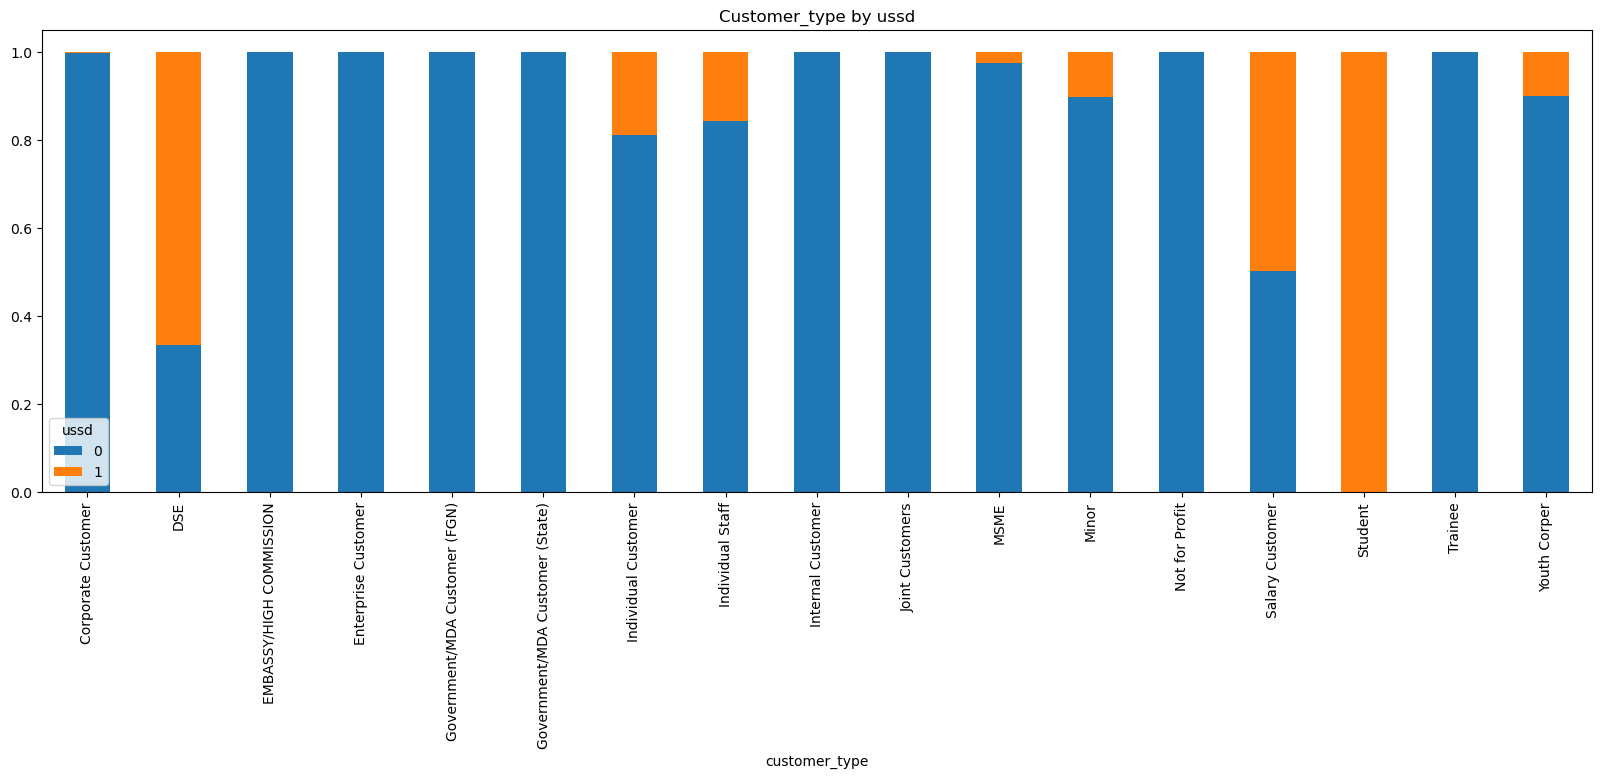

In [59]:
ussd=pd.crosstab(customers_df["customer_type"], customers_df["ussd"])
ussd.div(ussd.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(20,6),title="Customer_type by ussd")
ussd

In [60]:
Transaction_df.head(2)

,customer,accountid,AMOUNT_LCY,Trans_ID,Trans_timestamp,deb_cre_ind,narrative,transactiondescription
0,18354812,19888479,321685.0,FT202730YK10,2020-09-29 10:16:04,C,CHOICE INTERNATIONAL FORWARDING NIG?EMEKA LINU...,TRANSFER IN
1,12174614,16476167,1555.4,FT202661P8Q7,2020-09-22 15:47:31,C,BANK?NIP From 11000720092216005928289544?8107 ...,TRANSFER IN


In [61]:
 customers_df.head(2)

,customer,accountid,workingbalance,openingdate,Restriciton Code,address,email_1,account_status,Maxtransdate,product_group_desc,customer_type,region,sector,card_status,onebank,onepay,ussd
0,15045151,14607892,88.01,2016-06-10,25,NaN,NaN,Dormant,2020-10-27,Savings Accounts Group,Individual Customer,APAPA & BEYOND,ADMIN AND SUPPORT SERVICE ACT.,NaN,0,0,0
1,16273893,11143214,25293.31,2016-10-28,NaN,"IJESHA, LAGOS",NaN,Active,2022-03-23,Savings Accounts Group,Individual Customer,APAPA & BEYOND,GENERAL,Active,0,0,1


In [62]:
Transaction_df.accountid.isin(customers_data.accountid.tolist()).sum()


21379

# PART TWO

Comment 

Comment

In [63]:
# Merging the Transaction and Customer dataset Using the customer and accountid column
customers_transactions_data = pd.merge(Transaction_df, customers_df, how="inner", on=["customer", "accountid"])
customers_transactions_data

,customer,accountid,AMOUNT_LCY,Trans_ID,Trans_timestamp,deb_cre_ind,narrative,transactiondescription,workingbalance,openingdate,...,account_status,Maxtransdate,product_group_desc,customer_type,region,sector,card_status,onebank,onepay,ussd
0,14090403,11542643,56560.00,FT20266S4D4W,2020-09-22 18:07:10,C,BANK?NIP From 00001320092218530000017517?1020 ...,TRANSFER IN,496861.36,2016-11-08,...,Active,2022-03-23,Savings Accounts Group,Individual Customer,APAPA & BEYOND,GENERAL,NaN,0,1,0
1,14090403,11542643,1414000.00,FT20267ZP1P9,2020-09-23 10:25:15,C,BANK?NIP From 00000820092311052357308071?0001 ...,TRANSFER IN,496861.36,2016-11-08,...,Active,2022-03-23,Savings Accounts Group,Individual Customer,APAPA & BEYOND,GENERAL,NaN,0,1,0
2,14090403,11542643,1414000.00,FT20272GD8NG,2020-09-27 19:04:04,C,BANK?NIP From 00000820092719594915312839?0001 ...,TRANSFER IN,496861.36,2016-11-08,...,Active,2022-03-23,Savings Accounts Group,Individual Customer,APAPA & BEYOND,GENERAL,NaN,0,1,0
3,14090403,11542643,1414000.00,FT20267SBKG9,2020-09-23 15:42:29,D,NIBSS INSTANT PAYMENT TSS?Online to GTBank Plc...,TRF :,496861.36,2016-11-08,...,Active,2022-03-23,Savings Accounts Group,Individual Customer,APAPA & BEYOND,GENERAL,NaN,0,1,0
4,14090403,11542643,70700.00,FT20268JMF32,2020-09-24 16:44:11,D,NIBSS INSTANT PAYMENT TSS?Online to First Bank...,TRF :,496861.36,2016-11-08,...,Active,2022-03-23,Savings Accounts Group,Individual Customer,APAPA & BEYOND,GENERAL,NaN,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21382,12595394,17334726,8484.00,FT20246GJPR3,2020-09-02 09:12:08,C,BANK?NIP From 00001520090209564200112557?1388 ...,TRANSFER IN,1515.24,2012-12-05,...,Dormant,2021-03-02,Savings Accounts Group,Individual Customer,APAPA & BEYOND,EDUCATION,Active,0,0,1
21383,19975010,15969800,14140.00,FT20246QTDW7,2020-09-02 08:43:42,C,BANK?NIP From 00001320090209292500014969?5165 ...,TRANSFER IN,867519.37,2014-12-17,...,Active,2021-12-31,Savings Accounts Group,Individual Customer,APAPA & BEYOND,GENERAL,NaN,0,0,0
21384,16624448,15035381,28280.00,FT20245J4NM8,2020-08-31 17:26:48,D,RICHBAMATM2?STERLING BANK TERMINAL - ?RICHBAM ...,CASH WITHDRAWAL,134385.29,2007-10-18,...,Active,2022-03-21,Savings Accounts Group,Individual Customer,APAPA & BEYOND,GENERAL,Active,0,0,0
21385,13428739,13813582,272817.16,FT202557LTD6,2020-09-11 10:31:41,C,BANK?CorporateIBS/200911113114635589/TRF?IFO M...,TRANSFER IN,9.71,2018-05-18,...,Dormant,2020-11-11,Domiciliary Current Account Group,Corporate Customer,APAPA & BEYOND,PROF SCIENTIFIC AND TECH ACT.,NaN,0,0,0


In [102]:
customers_transactions_data.columns

Index(['customer', 'accountid', 'AMOUNT_LCY', 'Trans_ID', 'Trans_timestamp',
       'deb_cre_ind', 'narrative', 'transactiondescription', 'workingbalance',
       'openingdate', 'Restriciton Code', 'address', 'email_1',
       'account_status', 'Maxtransdate', 'product_group_desc', 'customer_type',
       'region', 'sector', 'card_status', 'onebank', 'onepay', 'ussd'],
      dtype='object')

In [64]:
customers_transactions_data.nunique()

customer                    838
accountid                   868
AMOUNT_LCY                 2178
Trans_ID                  20686
Trans_timestamp           19844
deb_cre_ind                   2
narrative                 14690
transactiondescription       20
workingbalance              864
openingdate                 640
Restriciton Code             10
address                     496
email_1                     334
account_status                3
Maxtransdate                162
product_group_desc            4
customer_type                15
region                        1
sector                       16
card_status                   3
onebank                       2
onepay                        2
ussd                          2
dtype: int64

In [65]:
counts = customers_transactions_data.value_counts
print(counts)

<bound method DataFrame.value_counts of        customer  accountid  AMOUNT_LCY      Trans_ID     Trans_timestamp  \
0      14090403   11542643    56560.00  FT20266S4D4W 2020-09-22 18:07:10   
1      14090403   11542643  1414000.00  FT20267ZP1P9 2020-09-23 10:25:15   
2      14090403   11542643  1414000.00  FT20272GD8NG 2020-09-27 19:04:04   
3      14090403   11542643  1414000.00  FT20267SBKG9 2020-09-23 15:42:29   
4      14090403   11542643    70700.00  FT20268JMF32 2020-09-24 16:44:11   
...         ...        ...         ...           ...                 ...   
21382  12595394   17334726     8484.00  FT20246GJPR3 2020-09-02 09:12:08   
21383  19975010   15969800    14140.00  FT20246QTDW7 2020-09-02 08:43:42   
21384  16624448   15035381    28280.00  FT20245J4NM8 2020-08-31 17:26:48   
21385  13428739   13813582   272817.16  FT202557LTD6 2020-09-11 10:31:41   
21386  16453623   12358240    16968.00  FT20248784DG 2020-09-04 07:13:45   

      deb_cre_ind                              

In [66]:
customers_data.customer.nunique()

4467

In [67]:
customers_transactions_data["customer"].value_counts()

customer
12912899    524
17372153    305
19146277    222
12158807    198
16713484    193
           ... 
18223757      1
17106013      1
10254095      1
14797453      1
16453623      1
Name: count, Length: 838, dtype: int64

In [68]:
customers_transactions_data["accountid"].value_counts()

accountid
14076094    524
10977806    305
16541833    222
11542111    198
19656057    193
           ... 
18508809      1
17559115      1
19371402      1
16946761      1
12358240      1
Name: count, Length: 868, dtype: int64

In [69]:
customers_transactions_data["customer"].value_counts().sum()

21387

In [70]:
customers_transactions_data["accountid"].value_counts().sum()

21387

In [71]:
customers_transactions_data.duplicated().sum()

0

In [72]:
customers_transactions_data.shape

(21387, 23)

In [73]:
customers_transactions_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21387 entries, 0 to 21386
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   customer                21387 non-null  int64         
 1   accountid               21387 non-null  int64         
 2   AMOUNT_LCY              21387 non-null  float64       
 3   Trans_ID                21387 non-null  object        
 4   Trans_timestamp         20020 non-null  datetime64[ns]
 5   deb_cre_ind             21387 non-null  object        
 6   narrative               21387 non-null  object        
 7   transactiondescription  21387 non-null  object        
 8   workingbalance          21387 non-null  float64       
 9   openingdate             21387 non-null  object        
 10  Restriciton Code        1131 non-null   object        
 11  address                 20120 non-null  object        
 12  email_1                 9973 non-null   object

In [74]:
customers_transactions_data.columns

Index(['customer', 'accountid', 'AMOUNT_LCY', 'Trans_ID', 'Trans_timestamp',
       'deb_cre_ind', 'narrative', 'transactiondescription', 'workingbalance',
       'openingdate', 'Restriciton Code', 'address', 'email_1',
       'account_status', 'Maxtransdate', 'product_group_desc', 'customer_type',
       'region', 'sector', 'card_status', 'onebank', 'onepay', 'ussd'],
      dtype='object')

In [75]:
region=pd.crosstab(customers_transactions_data["customer_type"],customers_transactions_data["region"])

region

region,APAPA & BEYOND
customer_type,
Corporate Customer,917
DSE,8
EMBASSY/HIGH COMMISSION,5
Enterprise Customer,345
Individual Customer,17614
Individual Staff,352
Internal Customer,86
Joint Customers,4
MSME,228


account_status,Active,Dormant,Inactive
customer_type,,,
Corporate Customer,775,55,87
DSE,8,0,0
EMBASSY/HIGH COMMISSION,1,0,4
Enterprise Customer,342,3,0
Individual Customer,16741,448,425
Individual Staff,352,0,0
Internal Customer,86,0,0
Joint Customers,0,0,4
MSME,221,7,0


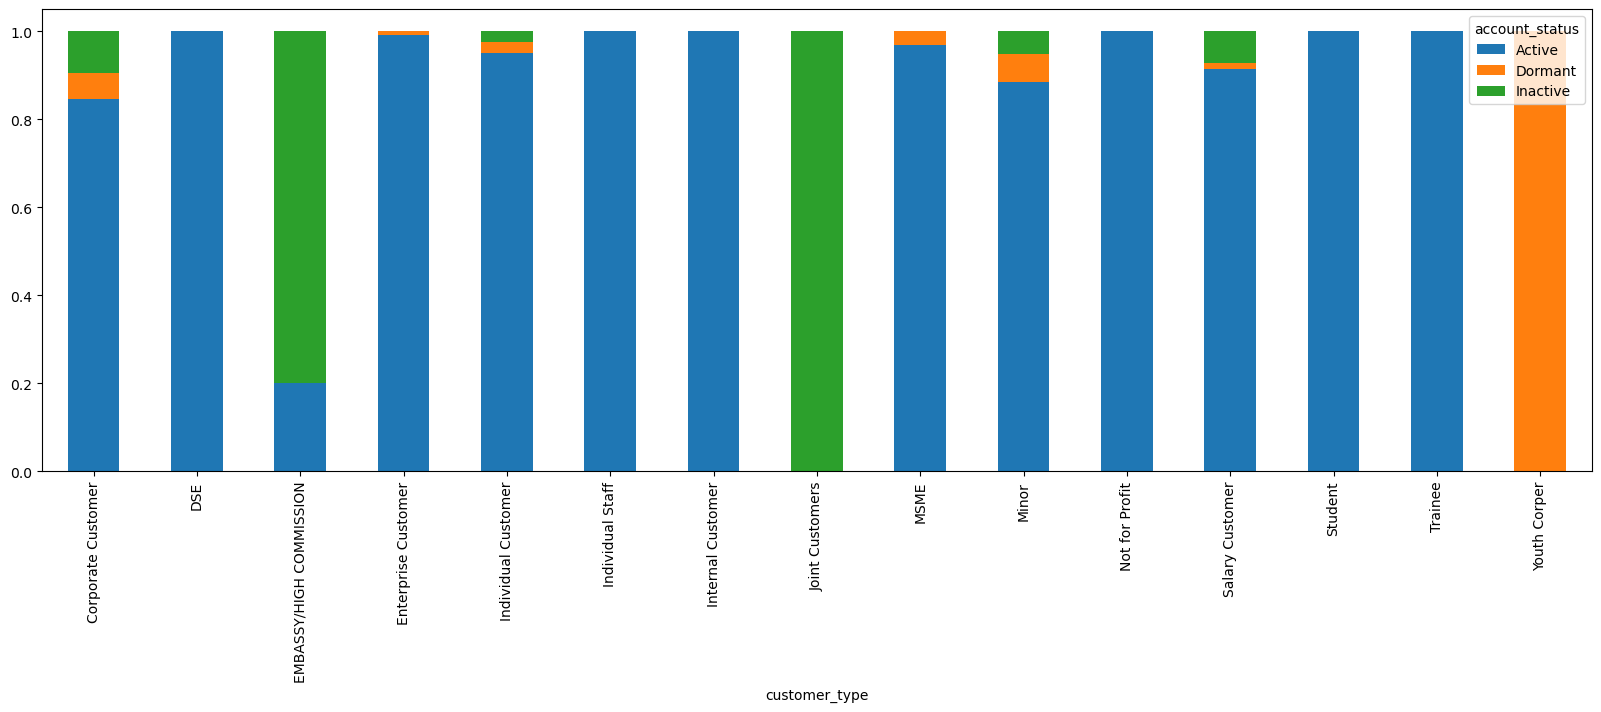

In [76]:
Account_status=pd.crosstab(customers_transactions_data["customer_type"], customers_transactions_data["account_status"])
Account_status.div(Account_status.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(20,6))
Account_status

After merging the customers and transactions datasets, there has been a notable increase in the number of active accounts across most customer types. However, there is still a significant rate of dormant and inactive accounts, particularly among Youth Corper and Individual Customer segments.

Specifically, the Youth Corper segment has 10 dormant accounts, a relatively small number but one that should not be overlooked. To address this, the bank should implement measures to reactivate these accounts, which could also help in attracting new Youth Corper accounts. Suggested measures include:
- Offering zero account fees and a free Naira card to encourage reactivation.

For the Individual Customer segment, which has 448 dormant and 425 inactive accounts, similar reactivation strategies could be effective. Implementing the following measures may help:
- Providing zero account fees and a free Naira card to boost activity.

In the case of Corporate Customers, where there are 55 dormant and 87 inactive accounts, the bank should consider:
- Selling collection solutions to enhance account activity.
- Implementing AI-driven solutions to detect and notify about fraudulent or suspicious activities, which could encourage more active engagement.

By focusing on these strategies, the bank can improve account activity and potentially attract new customers across various segments.

comment here

In [77]:
customers_transactions_data.columns

Index(['customer', 'accountid', 'AMOUNT_LCY', 'Trans_ID', 'Trans_timestamp',
       'deb_cre_ind', 'narrative', 'transactiondescription', 'workingbalance',
       'openingdate', 'Restriciton Code', 'address', 'email_1',
       'account_status', 'Maxtransdate', 'product_group_desc', 'customer_type',
       'region', 'sector', 'card_status', 'onebank', 'onepay', 'ussd'],
      dtype='object')

In [78]:
customers_transactions_data["customer_type"].value_counts()

customer_type
Individual Customer        17614
Salary Customer             1523
Corporate Customer           917
Individual Staff             352
Enterprise Customer          345
MSME                         228
Minor                        190
Internal Customer             86
Student                       61
Trainee                       27
Not for Profit                17
Youth Corper                  10
DSE                            8
EMBASSY/HIGH COMMISSION        5
Joint Customers                4
Name: count, dtype: int64

In [79]:
customers_transactions_data["workingbalance"].value_counts()

workingbalance
115.98         524
34083.04       305
312097.40      222
7049.58        198
24705.76       193
              ... 
32.55            1
11453983.94      1
453.57           1
790.75           1
278.05           1
Name: count, Length: 864, dtype: int64

In [80]:
#me still trying to understand the below
grouped = customers_transactions_data.groupby('workingbalance')
grouped

In [81]:
grouped['workingbalance'].agg(np.mean)

workingbalance
-2.392834e+06   -2.392834e+06
-1.177633e+06   -1.177633e+06
-8.606199e+05   -8.606199e+05
-3.593752e+05   -3.593752e+05
-2.487570e+05   -2.487570e+05
                     ...     
 1.355857e+07    1.355857e+07
 1.619366e+07    1.619366e+07
 1.847000e+07    1.847000e+07
 4.355323e+07    4.355323e+07
 1.020330e+08    1.020330e+08
Name: workingbalance, Length: 864, dtype: float64

In [82]:
!where python

C:\ProgramData\anaconda3\python.exe
C:\Program Files\Python312\python.exe
C:\Users\PC\AppData\Local\Microsoft\WindowsApps\python.exe


(array([2.1142e+04, 2.2100e+02, 0.0000e+00, 0.0000e+00, 7.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.7000e+01]),
 array([-2.39283378e+06,  8.04975152e+06,  1.84923368e+07,  2.89349221e+07,
         3.93775074e+07,  4.98200927e+07,  6.02626780e+07,  7.07052633e+07,
         8.11478486e+07,  9.15904339e+07,  1.02033019e+08]),
 <BarContainer object of 10 artists>)

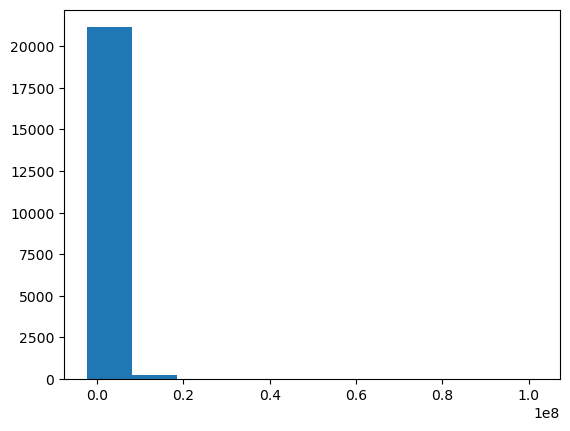

In [83]:
plt.hist(customers_transactions_data.workingbalance.values) #to this point trying understand why 

In [84]:
customers_transactions_data.columns

Index(['customer', 'accountid', 'AMOUNT_LCY', 'Trans_ID', 'Trans_timestamp',
       'deb_cre_ind', 'narrative', 'transactiondescription', 'workingbalance',
       'openingdate', 'Restriciton Code', 'address', 'email_1',
       'account_status', 'Maxtransdate', 'product_group_desc', 'customer_type',
       'region', 'sector', 'card_status', 'onebank', 'onepay', 'ussd'],
      dtype='object')

card_status,Active,Expired,Restricted
account_status,,,
Active,17336,1482,408
Dormant,481,17,12
Inactive,495,64,0


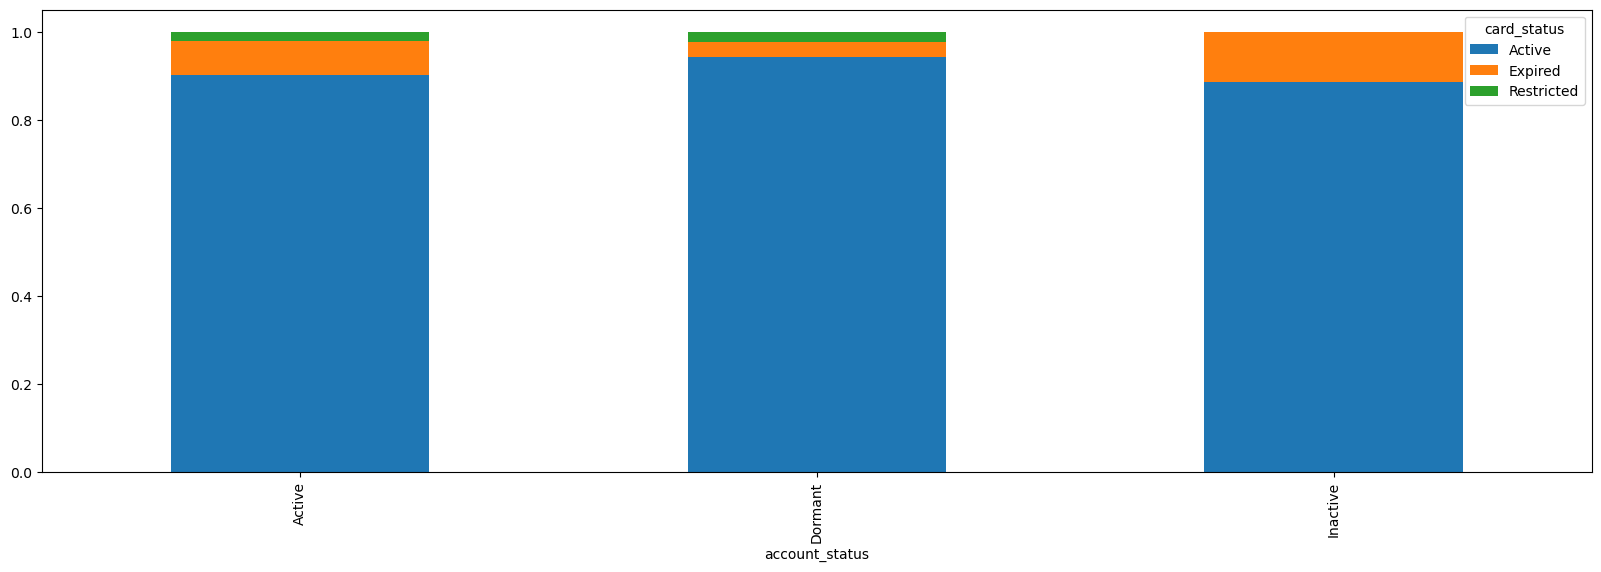

In [85]:
card_status_by_account_status=pd.crosstab(customers_transactions_data["account_status"], customers_transactions_data["card_status"])
card_status_by_account_status.div(card_status_by_account_status.sum(1).astype(float),axis=0).plot(kind="bar", stacked=True,figsize=(20,6))
card_status_by_account_status

*From the plot above, it was observed that:
  - "Active" accounts include 17,336 with active cards, 1,482 with expired cards, and 408 with restricted cards.
  - "Dormant" accounts include 481 with active cards, 17 with expired cards, and 12 with restricted cards.
  - "Inactive" accounts include 495 with active cards and 64 with expired cards.

This indicates a significant number of active accounts still have expired or restricted cards. Targeted communication to address card renewals or restrictions could help reactivate dormant and inactive accounts, potentially increasing overall engagement.

account_status,Active,Dormant,Inactive
product_group_desc,,,
Current Accounts Group,4023,152,201
Domiciliary Current Account Group,86,11,8
Domiciliary Savings Account Group,0,0,6
Savings Accounts Group,16031,393,424


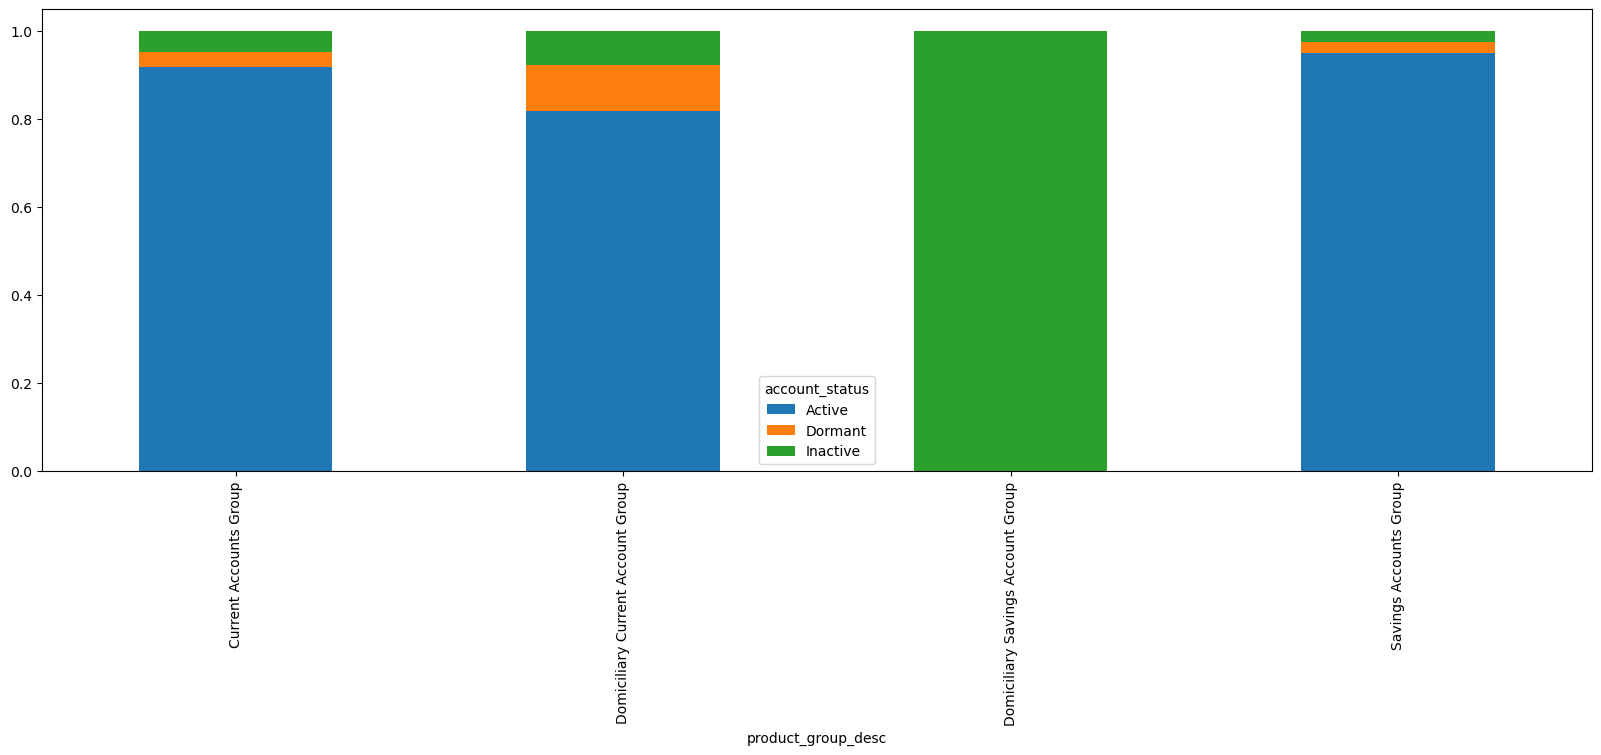

In [86]:
product_group=pd.crosstab(customers_transactions_data["product_group_desc"], customers_transactions_data["account_status"])
product_group.div(product_group.sum(1).astype(float),axis=0).plot(kind="bar", stacked=True,figsize=(20,6))
product_group

From the plot above, it was observed that the domiciliary savings account group has all its account inactive, this is understandable owing to the current FX rate in the country and this has caused unease in doing business in other currency.

In [87]:
customers_transactions_data.columns

Index(['customer', 'accountid', 'AMOUNT_LCY', 'Trans_ID', 'Trans_timestamp',
       'deb_cre_ind', 'narrative', 'transactiondescription', 'workingbalance',
       'openingdate', 'Restriciton Code', 'address', 'email_1',
       'account_status', 'Maxtransdate', 'product_group_desc', 'customer_type',
       'region', 'sector', 'card_status', 'onebank', 'onepay', 'ussd'],
      dtype='object')

onebank,0,1
customer_type,,
Corporate Customer,901,16
DSE,8,0
EMBASSY/HIGH COMMISSION,5,0
Enterprise Customer,345,0
Individual Customer,9984,7630
Individual Staff,0,352
Internal Customer,86,0
Joint Customers,4,0
MSME,228,0


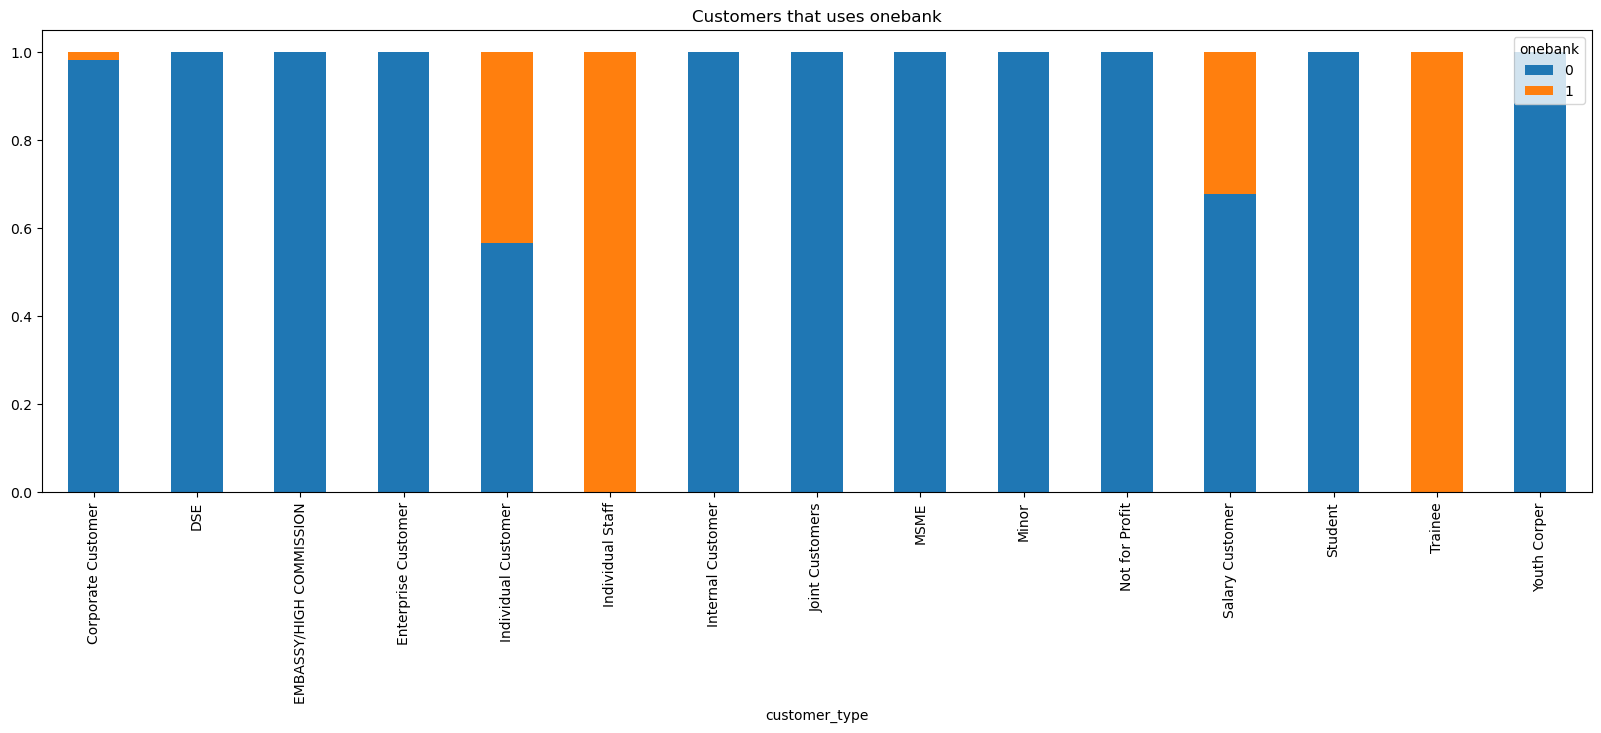

In [88]:
onebank_customers=pd.crosstab(customers_transactions_data["customer_type"],customers_transactions_data["onebank"])
onebank_customers.div(onebank_customers.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(20,6), title ="Customers that uses onebank")
onebank_customers

# Comments

* The following customer types have low or no adoption of 'OneBank':
  * 901 Corporate Customers
  * 345 Enterprise Customers
  * 9,984 Individual Customers
  * 1,033 Salary Customers
  * 228 MSME Customers

* To boost OneBank adoption, targeted campaigns offering personalized features or exclusive benefits could encourage these groups to start using the service, enhancing their banking experience and engagement.



onepay,0,1
customer_type,,
Corporate Customer,917,0
DSE,0,8
EMBASSY/HIGH COMMISSION,5,0
Enterprise Customer,345,0
Individual Customer,6008,11606
Individual Staff,0,352
Internal Customer,86,0
Joint Customers,4,0
MSME,228,0


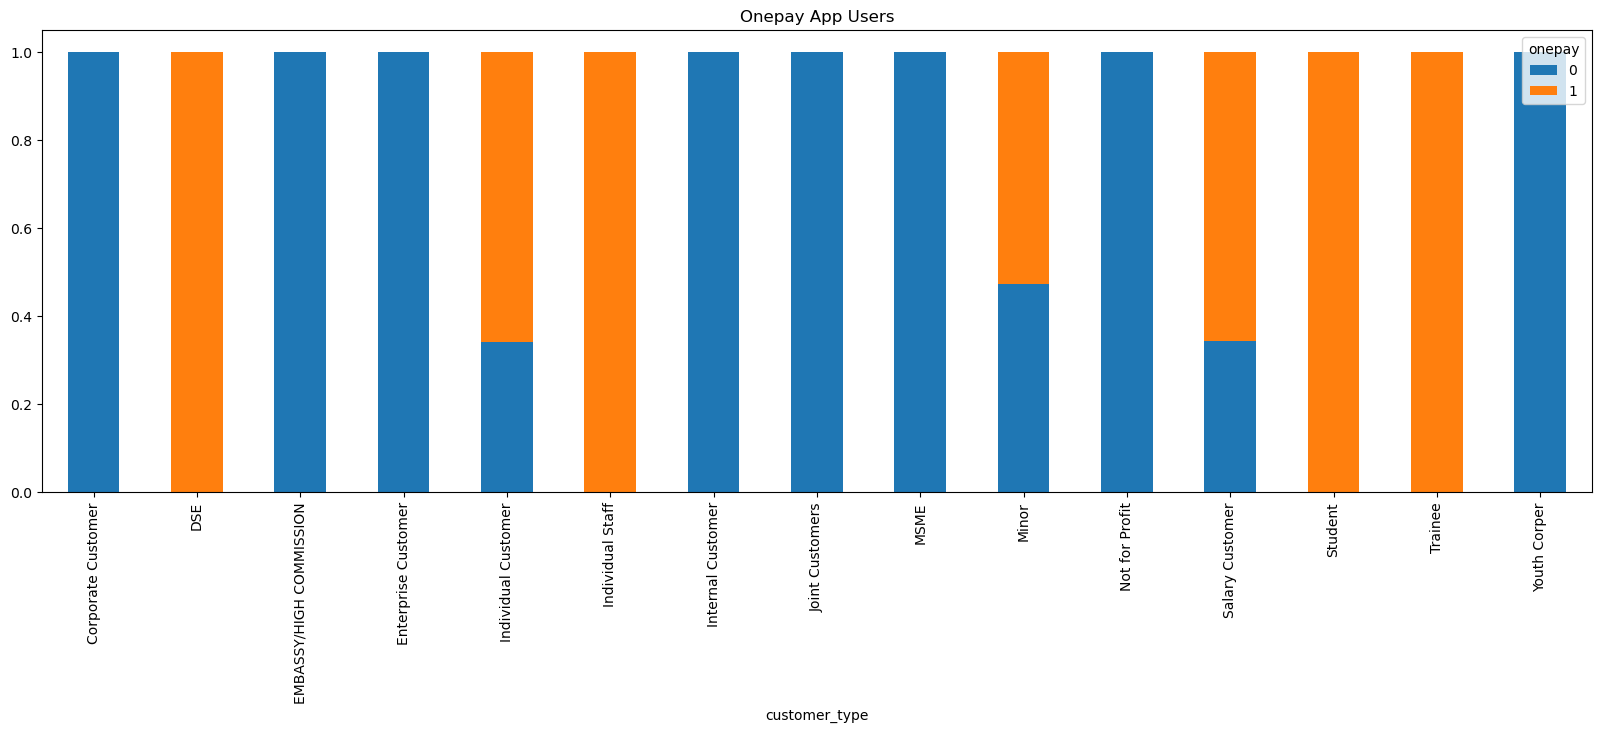

In [89]:
onepay_customers=pd.crosstab(customers_transactions_data["customer_type"],customers_transactions_data["onepay"])
onepay_customers.div(onebank_customers.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(20,6), title="Onepay App Users")
onepay_customers

# Comments

* The following customer types do not use 'OnePay':
  * 917 Corporate Customers
  * 345 Enterprise Customers
  * 6,008 Individual Customers
  * 522 Salary Customers
  * 228 MSME Customers

* Introducing targeted incentives, like cashback rewards or discounts for using OnePay, could effectively increase adoption among these groups, enhancing their transaction experience and overall engagement.

ussd,0,1
customer_type,,
Corporate Customer,917,0
DSE,0,8
EMBASSY/HIGH COMMISSION,5,0
Enterprise Customer,345,0
Individual Customer,3983,13631
Individual Staff,40,312
Internal Customer,86,0
Joint Customers,4,0
MSME,228,0


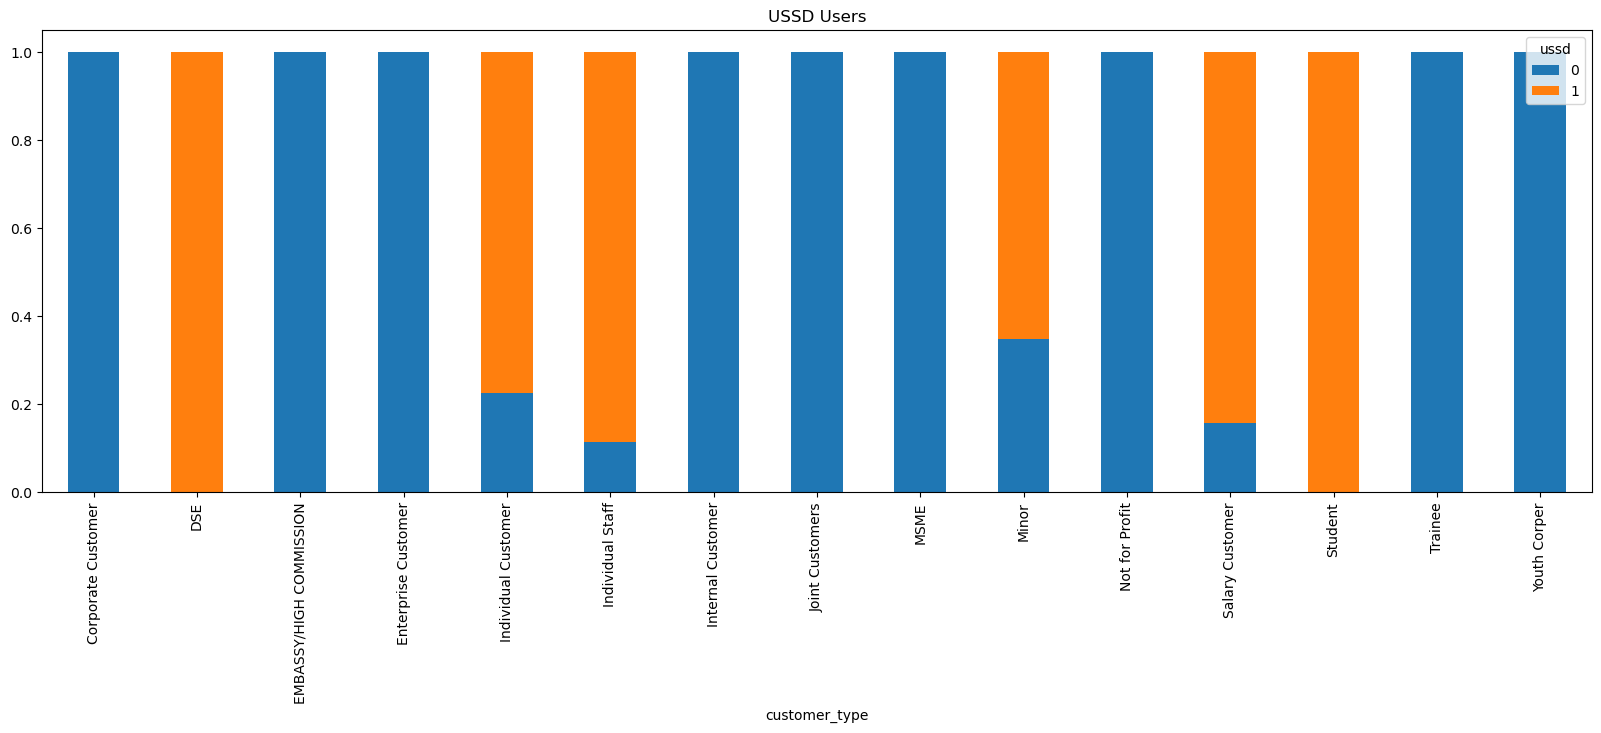

In [90]:
ussd_customers=pd.crosstab(customers_transactions_data["customer_type"],customers_transactions_data["ussd"])
ussd_customers.div(onebank_customers.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(20,6), title="USSD Users")
ussd_customers

# Comments 

* From the above plot, it is observed that the follwing type of customers do not use 'USSD'
* 917 corporate customers, 5 Embassy/high Commission customers, 345 Enterprise customers, 3983 Individual customers, 40 individual staff, 86 internal customers, 4 joint customers. 228 MSME customers, 66 Minor accounts, 17 not for profit accounts, 240 salary customer, 27 trainee accounts, 10 youth corper accounts 
* Measures can be taken to encourage all these account categories use the 'ussd' we can put up a promo like 'use the 'ussd' code to make transactions and you stand a chance to win N5000. This kind of promotion will encourage the different customer type pay attention to the ussd code.


**Conclusion:**

The analysis reveals several key insights into customer account activity and card status:

1. **High Inactivity in Specific Account Groups:**
   - Accounts in the "Domiciliary Savings Account Group" are entirely inactive, likely due to the current foreign exchange rates causing challenges for transactions in foreign currencies. This suggests that economic factors significantly impact account usage.

2. **Card Status Implications:**
   - There are substantial numbers of active accounts with expired or restricted cards. This indicates a need for targeted communication to address card renewals and restrictions, which could help reactivate dormant and inactive accounts.

3. **Opportunity for Increased Engagement:**
   - For product groups and cardholders with high inactivity or dormancy, targeted promotions, incentives, and improved digital solutions (such as OnePay and USSD) could boost engagement. Encouraging adoption through promotions or personalized communication might effectively reduce dormancy and increase overall account activity.

4. **Customer Segmentation:**
   - Different customer segments, such as "Corporate Customers" and "Individual Customers," show varying levels of engagement with digital services like OnePay and USSD. Tailored strategies to address the specific needs and preferences of these segments could enhance adoption and activity.

Overall, addressing the economic factors affecting account usage, improving card management processes, and implementing targeted engagement strategies could help improve account activity and reduce dormancy across different customer segments.